In [1]:
import threading
import time
import torch
import psutil  # Êñ∞Â¢ûÔºöËµÑÊ∫êÁõëÊéß
from RESNETEE import *
from openood.networks import ResNet18_32x32
from spliter import *
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset

# === ËµÑÊ∫êÁõëÊéßÂáΩÊï∞ ===
def print_resource_usage():
    # GPU memory usage
    allocated = torch.cuda.memory_allocated() / (1024 ** 2)  # MB
    reserved = torch.cuda.memory_reserved() / (1024 ** 2)    # MB

    # CPU usage
    cpu_percent = psutil.cpu_percent(interval=None)
    mem = psutil.virtual_memory()
    mem_used = mem.used / (1024 ** 2)
    mem_total = mem.total / (1024 ** 2)

    print(f"[ËµÑÊ∫êÁõëÊéß] GPUÂàÜÈÖç: {allocated:.1f} MB | GPU‰øùÁïô: {reserved:.1f} MB | CPUÂç†Áî®: {cpu_percent:.1f}% | ÂÜÖÂ≠ò‰ΩøÁî®: {mem_used:.1f}/{mem_total:.1f} MB")

# === Ê®°ÂûãÂä†ËΩΩ ===
base_model = ResNet18_32x32(num_classes=10)
model_with_exits = ResNet18AutoEarlyExits(resnet=base_model)
model_with_exits.load_state_dict(torch.load('model_with_exits.pth'))
model_with_exits.cuda()
model_with_exits.train()  # ÈªòËÆ§ÂºÄÂêØËÆ≠ÁªÉÊ®°Âºè‰ª•ÊîØÊåÅÂêéÁª≠ retrain

# === Êï∞ÊçÆÂä†ËΩΩ ===
train_dataset_1, train_dataset_2, test_dataset = split_cifar10_dataset()
print(f'Dataset 1 size: {len(train_dataset_1)}')
print(f'Dataset 2 size: {len(train_dataset_2)}')

train_loader_1 = DataLoader(train_dataset_1, batch_size=64, shuffle=True)
train_loader_2 = DataLoader(train_dataset_2, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# === ÂêåÊ≠•ÈîÅ ===
model_lock = threading.Lock()

# === Êé®ÁêÜÁ∫øÁ®ã ===
def inference_loop():
    model_with_exits.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.cuda()
            labels = labels.cuda()
            with model_lock:
                outputs, exits = model_with_exits(inputs, auto_select=True)
            print(f"[Êé®ÁêÜ] Á¨¨ {i} ‰∏™Ê†∑Êú¨ÂÆåÊàêÔºåÂá∫Âè£‰ΩçÁΩÆ: Exit{exits}")
            print_resource_usage()
            time.sleep(0.2)  # ÊéßÂà∂Êé®ÁêÜÈÄüÁéá

# === retrain Á∫øÁ®ãÔºàÂè™Êõ¥Êñ∞ exit1Ôºâ===
def retrain_loop():
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model_with_exits.early_exit1.parameters(), lr=0.01)

    while True:
        model_with_exits.train()
        inputs = torch.randn(1, 3, 32, 32).cuda()
        targets = torch.randint(0, 10, (1,)).cuda()
        with model_lock:
            output, _ = model_with_exits(inputs, return_exit1=True)
            loss = criterion(output, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("[ËÆ≠ÁªÉ] ËÆ≠ÁªÉ‰∫Ü‰∏ÄÊ¨° exit1")
        print_resource_usage()
        time.sleep(1.5)



C:\Users\Zhao\AppData\Local\Temp\ipykernel_9988\1606252020.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_with_exits.load_state_dict(torch.load('model_with_exits

Files already downloaded and verified
Files already downloaded and verified
Dataset 1 size: 25000
Dataset 2 size: 25000


In [2]:
model_with_exits

ResNet18AutoEarlyExits(
  (resnet): ResNet18_32x32(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (shortcut): Sequential()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), b

In [4]:
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from collections import defaultdict, Counter
def evaluate_and_log(model, dataloader, thresholds=(0.8872, 0.5428), device='cuda', force_exit=None): 
    model.eval()
    logs = {
        'logits': [],
        'confs': [],
        'preds': [],
        'labels': [],
        'exits': [],
    }

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Âº∫Âà∂‰ΩøÁî®Êüê‰∏™Âá∫Âè£ÔºàÁî®‰∫é A Ê®°ÂºèÊàñÂàÜÊûêÔºâ
            if force_exit == 1:
                outputs, _ = model(images, return_exit1=True)
                exit_ids = torch.ones(len(images), dtype=torch.long)  # Ê†áËÆ∞ exit1
            elif force_exit == 2:
                outputs, _ = model(images, return_exit2=True)
                exit_ids = torch.ones(len(images), dtype=torch.long) * 2  # Ê†áËÆ∞ exit2
            elif force_exit == 3:
                outputs, _ = model(images)
                exit_ids = torch.ones(len(images), dtype=torch.long) * 3  # Ê†áËÆ∞ exit3
            else:
                # ‰ΩøÁî®Ëá™Âä® early exit Ê®°Âºè
                outputs, exit_ids = model(
                    images,
                    auto_select=True,
                    threshold1=thresholds[0],
                    threshold2=thresholds[1]
                )

            # Ëé∑Âèñ softmax Ê¶ÇÁéá‰∏éÁΩÆ‰ø°Â∫¶È¢ÑÊµã
            probs = F.softmax(outputs, dim=1)
            confs, preds = torch.max(probs, dim=1)

            # ÈÄê‰∏™Ê†∑Êú¨ËÆ∞ÂΩïÊó•Âøó
            logs['logits'].extend(outputs.cpu())
            logs['confs'].extend(confs.cpu())
            logs['preds'].extend(preds.cpu())
            logs['labels'].extend(labels.cpu())
            logs['exits'].extend(exit_ids.cpu())

    return logs


def extract_exit_dataset(logs, exit_id):
    samples = [
        (log, pred) for log, pred, eid in zip(logs['logits'], logs['preds'], logs['exits']) if eid == exit_id
    ]
    if not samples:
        return None
    logits, preds = zip(*samples)
    logits = torch.stack(logits)
    preds = torch.tensor(preds)
    return TensorDataset(logits, preds)


def summarize_exits(logs):
    exit_counts = defaultdict(int)
    correct_counts = defaultdict(int)
    total = len(logs['labels'])

    for pred, label, exit_id in zip(logs['preds'], logs['labels'], logs['exits']):
        exit_counts[exit_id.item()] += 1
        if pred == label:
            correct_counts[exit_id.item()] += 1

    print("\n Exit Summary:")
    for exit_id in sorted(exit_counts.keys()):
        count = exit_counts[exit_id]
        correct = correct_counts[exit_id]
        acc = correct / count if count > 0 else 0
        print(f"  Exit {exit_id}: {count} samples, Accuracy = {acc:.2%}")

    overall_acc = sum(p == t for p, t in zip(logs['preds'], logs['labels'])) / total
    print(f"   Overall Accuracy: {overall_acc:.2%}")
    
def plot_exit_distribution(logs):
    counts = Counter([eid.item() for eid in logs['exits']])
    exits = sorted(counts.keys())
    values = [counts[e] for e in exits]

    plt.figure(figsize=(6, 4))
    plt.bar([f"Exit {e}" for e in exits], values, color='skyblue')
    plt.title(" Sample Distribution Across Exits")
    plt.xlabel("Exit Used")
    plt.ylabel("Number of Samples")
    plt.tight_layout()
    plt.show()
def per_class_accuracy(logs, class_names):
    correct_per_class = defaultdict(int)
    total_per_class = defaultdict(int)

    for pred, label in zip(logs['preds'], logs['labels']):
        cls = label.item()
        total_per_class[cls] += 1
        if pred == label:
            correct_per_class[cls] += 1

    print("\n Per-Class Accuracy:")
    for i, name in enumerate(class_names):
        total = total_per_class[i]
        correct = correct_per_class[i]
        acc = correct / total if total > 0 else 0
        print(f"  {name:<12}: {acc:.2%} ({correct}/{total})")
        
def exit_class_heatmap(logs, class_names):
    exit_class_counts = defaultdict(lambda: defaultdict(int))

    for label, exit_id in zip(logs['labels'], logs['exits']):
        exit_class_counts[exit_id.item()][label.item()] += 1

    exits = sorted(exit_class_counts.keys())
    matrix = []
    for eid in exits:
        row = [exit_class_counts[eid][i] for i in range(len(class_names))]
        matrix.append(row)

    plt.figure(figsize=(10, 4))
    sns.heatmap(np.array(matrix), annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=[f"Exit {e}" for e in exits])
    plt.xlabel("Class")
    plt.ylabel("Exit Used")
    plt.title("Heatmap of Class Distribution per Exit")
    plt.tight_layout()
    plt.show()
def print_exit_byclass_table(logs, class_names):
    exit_class_counts = defaultdict(lambda: defaultdict(int))
    for label, exit_id in zip(logs['labels'], logs['exits']):
        exit_class_counts[exit_id.item()][label.item()] += 1

    exits = sorted(exit_class_counts.keys())

    header = f"{'Class':<12} | " + " | ".join([f"Exit {e:<3}" for e in exits])
    print("\n Exit-Class ÂàÜÂ∏ÉÁªüËÆ°Ë°®")
    print(header)
    print("-" * len(header))

    for i, cls_name in enumerate(class_names):
        row = f"{cls_name:<12} | "
        row += " | ".join([f"{exit_class_counts[e].get(i, 0):<7}" for e in exits])
        print(row)


In [5]:
from plot_and_evaluate import *
# Example usage
id_classes  = ['airplane', 'automobile', 'bird', 'cat'] 
ood_classes = ['ship', 'truck','deer', 'dog', 'frog', 'horse']

# Assuming `model` and `testloader` are already defined
evaluate_EE_byclass(model_with_exits, test_loader, id_classes, ood_classes, return_exit1=True, return_exit2=False)

Accuracy for class airplane: 93.40%
Accuracy for class automobile: 94.90%
Accuracy for class bird: 0.60%
Accuracy for class cat: 0.90%
Accuracy for class deer: 2.40%
Accuracy for class dog: 4.30%
Accuracy for class frog: 6.50%
Accuracy for class horse: 0.20%
Accuracy for class ship: 92.50%
Accuracy for class truck: 95.70%
Accuracy for ID classes: 47.45%
Accuracy for OOD classes: 33.60%


In [4]:
evaluate_EE_byclass(model_with_exits, test_loader, id_classes, ood_classes, return_exit1=False, return_exit2=True)

Accuracy for class airplane: 96.40%
Accuracy for class automobile: 97.90%
Accuracy for class bird: 88.40%
Accuracy for class cat: 0.40%
Accuracy for class deer: 95.90%
Accuracy for class dog: 95.60%
Accuracy for class frog: 0.00%
Accuracy for class horse: 1.30%
Accuracy for class ship: 96.80%
Accuracy for class truck: 95.20%
Accuracy for ID classes: 70.78%
Accuracy for OOD classes: 64.13%


In [5]:
evaluate_EE_byclass(model_with_exits, test_loader, id_classes, ood_classes, return_exit1=False, return_exit2=False)

Accuracy for class airplane: 95.90%
Accuracy for class automobile: 98.20%
Accuracy for class bird: 92.50%
Accuracy for class cat: 88.60%
Accuracy for class deer: 97.00%
Accuracy for class dog: 92.20%
Accuracy for class frog: 95.60%
Accuracy for class horse: 96.40%
Accuracy for class ship: 96.60%
Accuracy for class truck: 96.30%
Accuracy for ID classes: 93.80%
Accuracy for OOD classes: 95.68%



 Exit Summary:
  Exit 1: 4065 samples, Accuracy = 88.86%
  Exit 2: 2904 samples, Accuracy = 93.80%
  Exit 3: 3031 samples, Accuracy = 92.74%
   Overall Accuracy: 91.47%


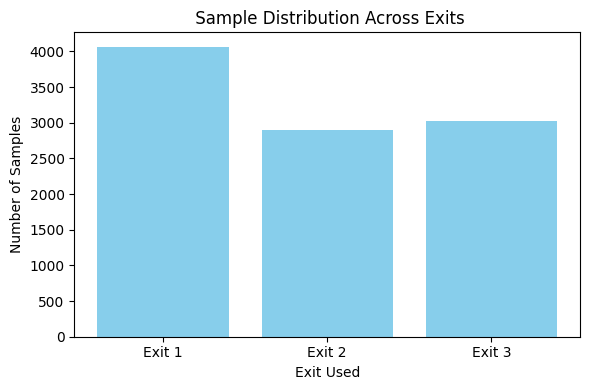


 Per-Class Accuracy:
  airplane    : 95.00% (950/1000)
  automobile  : 96.70% (967/1000)
  bird        : 82.70% (827/1000)
  cat         : 81.10% (811/1000)
  deer        : 93.30% (933/1000)
  dog         : 90.00% (900/1000)
  frog        : 93.40% (934/1000)
  horse       : 90.70% (907/1000)
  ship        : 95.40% (954/1000)
  truck       : 96.40% (964/1000)


In [4]:
logs = evaluate_and_log(model_with_exits, test_loader, thresholds=(0.9, 0.9))
summarize_exits(logs)
plot_exit_distribution(logs)
per_class_accuracy(logs, class_names)
exit3_ds = extract_exit_dataset(logs, exit_id=3)

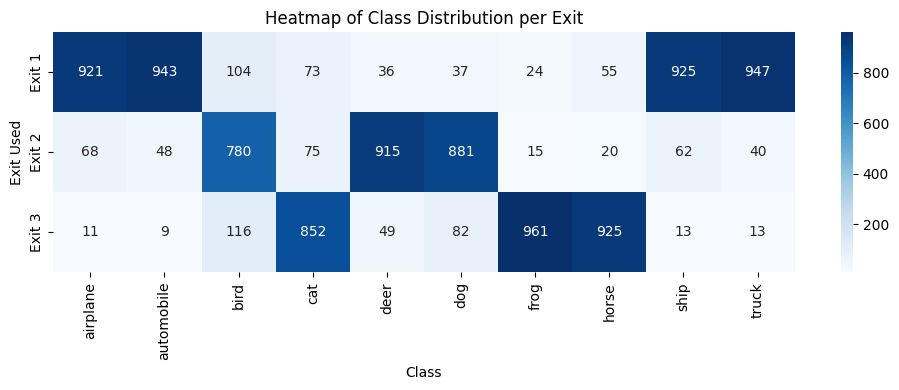


 Exit-Class ÂàÜÂ∏ÉÁªüËÆ°Ë°®
Class        | Exit 1   | Exit 2   | Exit 3  
---------------------------------------------
airplane     | 921     | 68      | 11     
automobile   | 943     | 48      | 9      
bird         | 104     | 780     | 116    
cat          | 73      | 75      | 852    
deer         | 36      | 915     | 49     
dog          | 37      | 881     | 82     
frog         | 24      | 15      | 961    
horse        | 55      | 20      | 925    
ship         | 925     | 62      | 13     
truck        | 947     | 40      | 13     


In [10]:
exit_class_heatmap(logs, class_names)
print_exit_byclass_table(logs, class_names)

In [6]:
import random
from torch.utils.data import Subset

def filter_by_samples(dataset, classes_ratios, seed=None):
    rng = random.Random(seed)
    indices = []
    
    # Á°ÆÂÆöÁ±ªÂà´Âà∞Á¥¢ÂºïÁöÑÊò†Â∞Ñ
    if hasattr(dataset, 'class_to_idx'):
        class_to_idx = dataset.class_to_idx
    else:
        class_to_idx = {cls: idx for idx, cls in enumerate(dataset.classes)}
    
    # Êî∂ÈõÜÊâÄÊúâÊ†∑Êú¨ÁöÑÊ†áÁ≠æ
    if hasattr(dataset, 'targets'):
        labels = dataset.targets
    elif hasattr(dataset, 'samples'):
        labels = [label for (_, label) in dataset.samples]
    else:
        labels = []
        for i in range(len(dataset)):
            _, label = dataset[i]
            labels.append(label)
    
    # Â§ÑÁêÜÊØè‰∏™Á±ªÂà´
    for cls, ratio in classes_ratios.items():
        if cls not in class_to_idx:
            raise ValueError(f"Class {cls} not found in dataset.")
        
        class_idx = class_to_idx[cls]
        class_indices = [i for i, label in enumerate(labels) if label == class_idx]
        
        if not class_indices:
            continue
        
        # ËÆ°ÁÆóÊ†∑Êú¨Êï∞ÈáèÂπ∂Á°Æ‰øùÊúâÊïàÊÄß
        num_samples = int(len(class_indices) * ratio)
        num_samples = max(0, min(num_samples, len(class_indices)))
        
        if num_samples == 0:
            continue
        
        # ÈöèÊú∫ÊäΩÊ†∑
        selected = rng.sample(class_indices, num_samples)
        indices.extend(selected)
    
    # Êâì‰π±Êï¥‰ΩìÈ°∫Â∫è
    rng.shuffle(indices)
    return Subset(dataset, indices)
# ÂÆö‰πâ‰∏çÂêåÁ±ªÂà´ÁöÑÊ†∑Êú¨ÊØî‰æã
classes_ratios = {
    'airplane': 0.8,    # 4‰∏™Á±ªÂà´ÂêÑ80%
    'automobile': 0.8,
    'bird': 0.8,
    'cat': 0.8,
    'deer': 0.6,        # 3‰∏™Á±ªÂà´ÂêÑ60%
    'dog': 0.6,
    'frog': 0.6,
    'horse': 0.1,       # Ââ©‰Ωô3‰∏™Á±ªÂà´ÂêÑ10%
    'ship': 0.1,
    'truck': 0.1
}

# ÂàõÂª∫Â≠êÈõÜ

subset = filter_by_samples(test_dataset, classes_ratios, seed=42)

# Êü•ÁúãÁªìÊûú
print(f"Total samples in subset: {len(subset)}")
from collections import Counter

# Ëé∑ÂèñÂéüÂßãÁ±ªÂà´ÂàÜÂ∏É
original_counts = Counter(test_dataset.targets)

# Ëé∑ÂèñÂ≠êÈõÜÁ±ªÂà´ÂàÜÂ∏É
subset_labels = [test_dataset.targets[i] for i in subset.indices]
subset_counts = Counter(subset_labels)

# ÊâìÂç∞ÁªìÊûú
for cls, idx in test_dataset.class_to_idx.items():
    original = original_counts[idx]
    subset_number = subset_counts.get(idx, 0)
    ratio = classes_ratios.get(cls, 0)
    print(f"{cls:10} | Original: {original:4} | Subset: {subset_number:4} | Target Ratio: {ratio:.0%} | Actual Ratio: {subset_number/original:.1%}")

Total samples in subset: 5300
airplane   | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
automobile | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
bird       | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
cat        | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
deer       | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
dog        | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
frog       | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
horse      | Original: 1000 | Subset:  100 | Target Ratio: 10% | Actual Ratio: 10.0%
ship       | Original: 1000 | Subset:  100 | Target Ratio: 10% | Actual Ratio: 10.0%
truck      | Original: 1000 | Subset:  100 | Target Ratio: 10% | Actual Ratio: 10.0%


In [7]:
new_distribution_loader= DataLoader(subset, batch_size=64, shuffle=True)

In [8]:

from plot_and_evaluate import *
# Example usage
id_classes  = ['airplane', 'automobile', 'bird', 'cat'] 
ood_classes = ['ship', 'truck','deer', 'dog', 'frog', 'horse']
evaluate_EE_byclass(model_with_exits, new_distribution_loader, id_classes, ood_classes, return_exit1=True, return_exit2=False)

Accuracy for class airplane: 93.25%
Accuracy for class automobile: 94.88%
Accuracy for class bird: 0.62%
Accuracy for class cat: 0.88%
Accuracy for class deer: 2.50%
Accuracy for class dog: 3.50%
Accuracy for class frog: 7.83%
Accuracy for class horse: 0.00%
Accuracy for class ship: 94.00%
Accuracy for class truck: 97.00%
Accuracy for ID classes: 47.41%
Accuracy for OOD classes: 13.05%



 Exit Summary:
  Exit 1: 1911 samples, Accuracy = 85.24%
  Exit 2: 2009 samples, Accuracy = 89.45%
  Exit 3: 1380 samples, Accuracy = 93.91%
   Overall Accuracy: 89.09%


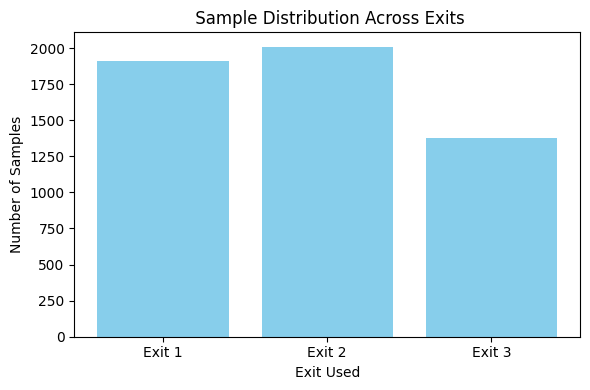


 Per-Class Accuracy:
  airplane    : 95.00% (760/800)
  automobile  : 96.75% (774/800)
  bird        : 79.88% (639/800)
  cat         : 78.50% (628/800)
  deer        : 92.17% (553/600)
  dog         : 89.50% (537/600)
  frog        : 92.50% (555/600)
  horse       : 80.00% (80/100)
  ship        : 96.00% (96/100)
  truck       : 100.00% (100/100)


In [6]:
logs = evaluate_and_log(model_with_exits, new_distribution_loader, thresholds=(0.88, 0.54))
summarize_exits(logs)
plot_exit_distribution(logs)
per_class_accuracy(logs, class_names)
exit3_ds = extract_exit_dataset(logs, exit_id=3)

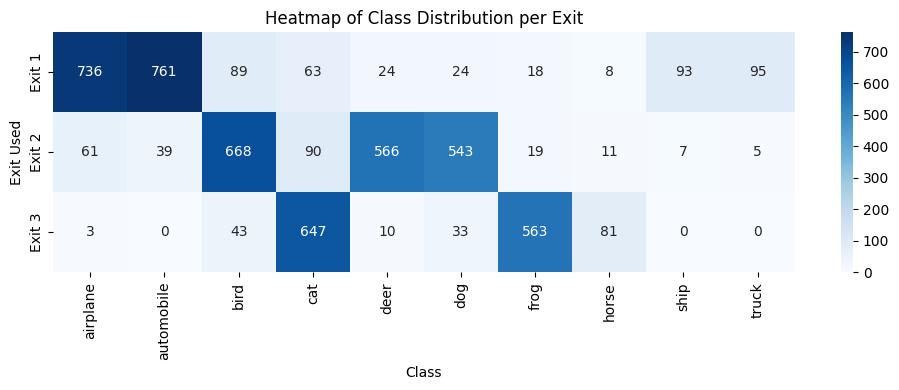


 Exit-Class ÂàÜÂ∏ÉÁªüËÆ°Ë°®
Class        | Exit 1   | Exit 2   | Exit 3  
---------------------------------------------
airplane     | 736     | 61      | 3      
automobile   | 761     | 39      | 0      
bird         | 89      | 668     | 43     
cat          | 63      | 90      | 647    
deer         | 24      | 566     | 10     
dog          | 24      | 543     | 33     
frog         | 18      | 19      | 563    
horse        | 8       | 11      | 81     
ship         | 93      | 7       | 0      
truck        | 95      | 5       | 0      


In [14]:
exit_class_heatmap(logs, class_names)
print_exit_byclass_table(logs, class_names)

## Pattern A

In [9]:
# Function to filter dataset by classes
def filter_by_classes(dataset, classes_to_include):
    class_indices = [dataset.class_to_idx[cls] for cls in classes_to_include]
    indices = [i for i, (_, label) in enumerate(dataset.samples) if label in class_indices]
    return Subset(dataset, indices)

In [10]:
# Define the four classes and the remaining six classes
classes_subset1a = ['airplane', 'automobile', 'bird', 'cat'] 
classes_subset1b =  ['ship', 'truck','deer', 'dog', 'frog', 'horse'] # Remaining classes 

# Create subsets for the four classes and the other six classes
subset1a = {'train':filter_by_classes(train_dataset_1, classes_subset1a),
              'test':filter_by_classes(test_dataset, classes_subset1a)}
subset1b = {'train':filter_by_classes(train_dataset_1, classes_subset1b),
            'test':filter_by_classes(test_dataset, classes_subset1b)}
# Create DataLoaders for each subset
dataloaders_subset1a = {
    'train': DataLoader(subset1a['train'], batch_size=64, shuffle=True, num_workers=4),
    'test': DataLoader(subset1a['test'], batch_size=64, shuffle=False, num_workers=4)
}
dataloaders_subset1b = {
    'train': DataLoader(subset1b['train'], batch_size=64, shuffle=True, num_workers=4),
    'test': DataLoader(subset1b['test'], batch_size=64, shuffle=False, num_workers=4)
}

In [11]:
# Define the four classes and the remaining six classes
classes_subset2a = ['airplane','automobile', 'bird','cat','deer', 'dog','frog' ]
classes_subset2b =  [ 'horse','ship', 'truck'] # Remaining classes 
# Create subsets for the four classes and the other six classes
subset2a = {'train':filter_by_classes(train_dataset_1, classes_subset2a),
              'test':filter_by_classes(test_dataset, classes_subset2a)}
subset2b = {'train':filter_by_classes(train_dataset_1, classes_subset2b),
            'test':filter_by_classes(test_dataset, classes_subset2b)}
# Create DataLoaders for each subset
dataloaders_subset2a = {
    'train': DataLoader(subset2a['train'], batch_size=64, shuffle=True, num_workers=4),
    'test': DataLoader(subset2a['test'], batch_size=64, shuffle=False, num_workers=4)
}
dataloaders_subset2b = {
    'train': DataLoader(subset2b['train'], batch_size=64, shuffle=True, num_workers=4),
    'test': DataLoader(subset2b['test'], batch_size=64, shuffle=False, num_workers=4)
}

In [23]:
def trainEE_KL(
    model, 
    id_dataloader, 
    id_testloader,
    ood_dataloader, 
    exit_number,
    criterion_id, 
    optimizer,
    stepsize = 30,
    num_epochs=50,
    alpha = 0.5,
    # Êñ∞Â¢ûÂèÇÊï∞ÔºàÊó†ÈúÄÊâãÂä®‰º†ÈÄíÔºâ
    stop_event=None,     # type: threading.Event
    request_queue=None   # type: Queue
):
    if stepsize > 0:
        scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[20,40,50])
        
    for epoch in range(num_epochs):
        # Ê£ÄÊü•ÂÅúÊ≠¢‰ø°Âè∑
        if stop_event and stop_event.is_set():
            print("\n[training has been terminated by user]")
            return
            
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        model.train()
        running_loss = 0.0
        id_corrects = 0
        ood_certainty = []

        # Ê∑∑ÂêàÊï∞ÊçÆÊâπÊ¨°
        data_iter = zip(id_dataloader, cycle(ood_dataloader))
        for batch_idx, ((id_inputs, id_labels), (ood_inputs, _)) in enumerate(data_iter):
            # Â§ÑÁêÜÈòüÂàó‰∏≠ÁöÑËØ∑Ê±ÇÔºàÊØè‰∏™batchÂ§ÑÁêÜ‰∏ÄÊ¨°Ôºâ
            if request_queue and not request_queue.empty():
                while not request_queue.empty():
                    sample = request_queue.get()
                    print(f"\n[realtime request] samples siza: {sample.shape}")
                    with torch.no_grad():
                        if exit_number == 1:
                            pred, _ = model(sample.to('cuda'), return_exit1=True)
                        elif exit_number == 2:
                            pred, _ = model(sample.to('cuda'), return_exit2=True)
                        print(f"prediction: {torch.argmax(pred).item()}")

            # ÂéüÂßãËÆ≠ÁªÉÈÄªËæë
            inputs = torch.cat([id_inputs, ood_inputs], dim=0).to('cuda')
            labels = torch.cat([id_labels, torch.zeros(len(ood_inputs))], dim=0).to('cuda')
            is_id = torch.cat([torch.ones(len(id_inputs)), torch.zeros(len(ood_inputs))], dim=0).to('cuda')

            optimizer.zero_grad()

            if exit_number == 1:
                outputs, _ = model(inputs, return_exit1=True)
            elif exit_number == 2:
                outputs, _ = model(inputs, return_exit2=True)
            else:
                outputs,_ = model(inputs)

            ce_loss = criterion_id(outputs[:len(id_inputs)], labels[:len(id_inputs)].long())
            probs = F.softmax(outputs[len(id_inputs):],dim=1)
            uniform_dist = torch.ones_like(probs)/probs.size(1)
            kl_div = nn.KLDivLoss(reduction='batchmean')(F.log_softmax(outputs[len(id_inputs):], dim=1), uniform_dist)
            loss = torch.mean(is_id * ce_loss + alpha * (1 - is_id) * kl_div)    

            loss.backward()
            optimizer.step()

            # ÁªüËÆ°‰ø°ÊÅØ
            running_loss += loss.item() * inputs.size(0)
            _, id_preds = torch.max(outputs[:len(id_inputs)], 1)
            id_corrects += torch.sum(id_preds == labels[:len(id_inputs)].long()).item()
            ood_certainty.append(torch.mean(F.softmax(outputs[len(id_inputs):], dim=1).max(dim=1).values).item())

        epoch_loss = running_loss / (len(id_dataloader.dataset) + len(ood_dataloader.dataset))
        epoch_id_acc = id_corrects / len(id_dataloader.dataset)
        avg_ood_certainty = sum(ood_certainty) / len(ood_certainty)
        
        print(f'Train Loss: {epoch_loss:.4f} | ID Acc: {epoch_id_acc:.4f} | OOD Certainty: {avg_ood_certainty:.4f}')
        if stepsize> 0: 
            scheduler.step()

In [20]:
from torch.profiler import profile, ProfilerActivity, tensorboard_trace_handler
from itertools import cycle
import torch.nn.functional as F

def trainEE_KL(
    model, 
    id_dataloader, 
    id_testloader,
    ood_dataloader, 
    exit_number,
    criterion_id, 
    optimizer,
    stepsize = 30,
    num_epochs=50,
    alpha = 0.5,
    stop_event=None,     # type: threading.Event
    request_queue=None   # type: Queue
):
    if stepsize > 0:
        scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[20,40,50])
    

    for epoch in range(num_epochs):
        if stop_event and stop_event.is_set():
            print("\n[training has been terminated by user]")
            return

        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        model.train()
        running_loss = 0.0
        id_corrects = 0
        ood_certainty = []

        data_iter = zip(id_dataloader, cycle(ood_dataloader))
        for batch_idx, ((id_inputs, id_labels), (ood_inputs, _)) in enumerate(data_iter):
            if request_queue and not request_queue.empty():
                while not request_queue.empty():
                    sample = request_queue.get()
                    print(f"\n[realtime request] samples siza: {sample.shape}")
                    with torch.no_grad():
                        if exit_number == 1:
                            pred, _ = model(sample.to('cuda'), return_exit1=True)
                        elif exit_number == 2:
                            pred, _ = model(sample.to('cuda'), return_exit2=True)
                        print(f"prediction: {torch.argmax(pred).item()}")

            inputs = torch.cat([id_inputs, ood_inputs], dim=0).to('cuda')
            labels = torch.cat([id_labels, torch.zeros(len(ood_inputs))], dim=0).to('cuda')
            is_id = torch.cat([torch.ones(len(id_inputs)), torch.zeros(len(ood_inputs))], dim=0).to('cuda')

            optimizer.zero_grad()

            if exit_number == 1:
                outputs, _ = model(inputs, return_exit1=True)
            elif exit_number == 2:
                outputs, _ = model(inputs, return_exit2=True)
            else:
                outputs,_ = model(inputs)

            ce_loss = criterion_id(outputs[:len(id_inputs)], labels[:len(id_inputs)].long())
            probs = F.softmax(outputs[len(id_inputs):],dim=1)
            uniform_dist = torch.ones_like(probs)/probs.size(1)
            kl_div = nn.KLDivLoss(reduction='batchmean')(
                F.log_softmax(outputs[len(id_inputs):], dim=1), uniform_dist
            )
            loss = torch.mean(is_id * ce_loss + alpha * (1 - is_id) * kl_div)    

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, id_preds = torch.max(outputs[:len(id_inputs)], 1)
            id_corrects += torch.sum(id_preds == labels[:len(id_inputs)].long()).item()
            ood_certainty.append(
                torch.mean(F.softmax(outputs[len(id_inputs):], dim=1).max(dim=1).values).item()
            )

     

            epoch_loss = running_loss / (len(id_dataloader.dataset) + len(ood_dataloader.dataset))
            epoch_id_acc = id_corrects / len(id_dataloader.dataset)
            avg_ood_certainty = sum(ood_certainty) / len(ood_certainty)

            print(f'Train Loss: {epoch_loss:.4f} | ID Acc: {epoch_id_acc:.4f} | OOD Certainty: {avg_ood_certainty:.4f}')
            if stepsize > 0:
                scheduler.step()


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from itertools import cycle
import threading
from queue import Queue
# === Â§öÁ∫øÁ®ãËÆ≠ÁªÉÊéßÂà∂Âô®Â∞ÅË£Ö ===
class TrainingController:
    def __init__(self):
        self.stop_event = threading.Event()
        self.request_queue = Queue()
        self.train_thread = None

    def start_training(self, train_function, **kwargs):
        """ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã"""
        def _wrapper():
            train_function(
                stop_event=self.stop_event,
                request_queue=self.request_queue,
                **kwargs
            )
        self.stop_event.clear()
        self.train_thread = threading.Thread(target=_wrapper)
        self.train_thread.start()

    def add_request(self, data):
        """Ê∑ªÂä†ÂÆûÊó∂Êé®ÁêÜËØ∑Ê±ÇÔºàÊöÇ‰∏çÁî®‰∫é A Ê®°ÂºèÔºâ"""
        self.request_queue.put(data)

    def stop_training(self):
        """ÂÅúÊ≠¢ËÆ≠ÁªÉÁ∫øÁ®ã"""
        self.stop_event.set()
        if self.train_thread:
            self.train_thread.join()

# === ÂàõÂª∫‰∏§‰∏™ÊéßÂà∂Âô®ÂÆû‰æã ===
controller1 = TrainingController()  # ÊéßÂà∂ Exit1 ÁöÑËÆ≠ÁªÉ
controller2 = TrainingController()  # ÊéßÂà∂ Exit2 ÁöÑËÆ≠ÁªÉ

In [14]:
def analyze_exit_logs_with_accuracy(all_logs, class_names):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    df = pd.DataFrame(all_logs)

    # ===== 1. ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéá =====
    acc_stats = df.groupby('exit').apply(
        lambda g: pd.Series({
            'correct': (g['true'] == g['pred']).sum(),
            'total': len(g),
            'accuracy': (g['true'] == g['pred']).mean()
        })
    )

    print("\nüìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö")
    print(acc_stats[['correct', 'total', 'accuracy']])

    # ===== 2. ÊØè‰∏™Âá∫Âè£„ÄÅÊØè‰∏™Á±ªÂà´ÁöÑÂáÜÁ°ÆÁéá =====
    print("\nüìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö")
    grouped = df.groupby(['exit', 'true'])

    per_class_acc = {}
    for (exit_num, cls_id), group in grouped:
        correct = (group['pred'] == group['true']).sum()
        total = len(group)
        acc = correct / total if total > 0 else 0.0
        per_class_acc.setdefault(exit_num, {})[class_names[cls_id]] = acc

    # ÊâìÂç∞ÊØè‰∏™Âá∫Âè£ÁöÑ per-class ÂáÜÁ°ÆÁéá
    for exit_num in sorted(per_class_acc.keys()):
        print(f"\nüìå Exit {exit_num}Ôºö")
        for cls in class_names:
            acc = per_class_acc[exit_num].get(cls, 0.0)
            print(f"  {cls:<12}: {acc:.2%}")

    # ===== 3. ÊØè‰∏™Âá∫Âè£ÁöÑÈ¢ÑÊµãÁ±ªÂà´ÂàÜÂ∏ÉÔºàÁî®‰∫éÂèØËßÜÂåñÔºâ =====
    exit_class_pred = pd.crosstab(df['exit'], df['pred'], rownames=['Exit'], colnames=['Predicted Class'])
    exit_class_pred.columns = [class_names[c] for c in exit_class_pred.columns]

    print("\nüìà ÊØè‰∏™Âá∫Âè£ÁöÑÈ¢ÑÊµãÁ±ªÂà´ÂàÜÂ∏ÉÔºö")
    display(exit_class_pred)

    # ===== 4. ÂèØËßÜÂåñÔºöÊü±Áä∂Âõæ =====
    exit_class_pred.T.plot(kind='bar', figsize=(10, 5))
    plt.title("Exit-wise Predicted Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Sample Count")
    plt.tight_layout()
    plt.show()

    # ===== 5. ÂèØËßÜÂåñÔºöÁÉ≠ÂäõÂõæ =====
    plt.figure(figsize=(8, 4))
    sns.heatmap(exit_class_pred, annot=True, fmt='d', cmap='YlGnBu')
    plt.title("Exit-Class Prediction Heatmap")
    plt.ylabel("Exit")
    plt.xlabel("Class")
    plt.tight_layout()
    plt.show()


In [15]:
class Timer:
    def __init__(self, name="Timer"):
        self.name = name
        self.start_time = None

    def start(self):
        self.start_time = time.time()

    def stop(self):
        if self.start_time is None:
            print(f"{self.name} Êú™ÂºÄÂßãËÆ°Êó∂ÔºÅ")
            return
        self.duration = time.time() - self.start_time
        print(f"[{self.name}] ËÄóÊó∂: {self.duration:.2f} Áßí\n")
        return self.duration
    def elapsed(self):
        return round(self.duration, 2)

In [16]:
import pandas as pd
def _visualize_exit_distribution(log_dict, title_suffix=""):
    if not log_dict or all(len(v) == 0 for v in log_dict.values()):
        print(f"[Ë∑≥Ëøá] {title_suffix} Êé®ÁêÜÊï∞ÊçÆ‰∏∫Á©∫ÔºåÊó†Ê≥ïÂèØËßÜÂåñ„ÄÇ")
        return

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    exit_class_dist = pd.DataFrame.from_dict(
        {k: Counter(v) for k, v in log_dict.items()},
        orient='index'
    ).fillna(0).astype(int)

    for i in range(len(class_names)):
        if i not in exit_class_dist.columns:
            exit_class_dist[i] = 0
    exit_class_dist = exit_class_dist[sorted(exit_class_dist.columns)]
    exit_class_dist.columns = class_names

    exit_class_dist.T.plot(kind='bar', figsize=(10, 5))
    plt.title(f"Exit-wise Class Distribution {title_suffix}")
    plt.xlabel("Class")
    plt.ylabel("Sample Count")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.heatmap(exit_class_dist, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Exit-Class Heatmap {title_suffix}")
    plt.ylabel("Exit")
    plt.xlabel("Class")
    plt.tight_layout()
    plt.show()

In [28]:
def run_full_suspension_parallel_realtime_logging(
    model,
    controller1, controller2,
    inference_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b,
    device='cuda'
):
    import time, psutil
    from collections import defaultdict, Counter
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import torch.nn.functional as F
    from torch.profiler import profile, ProfilerActivity, tensorboard_trace_handler
    results = {}
    process = psutil.Process()

    def get_system_status(label):
        mem = process.memory_info().rss / 1024 ** 2
        threads = process.num_threads()
        return {
            f"Memory {label} (MB)": round(mem, 2),
            f"Threads {label}": threads
        }

    # === Âä†ËΩΩÊ®°ÂûãÂêéÔºåËÆ∞ÂΩïÂàùÂßãÁä∂ÊÄÅ ===
    model.load_state_dict(torch.load('model_with_exits.pth'))
    results.update(get_system_status("After Model Load"))
    
    # === ÂÜªÁªì‰∏ªÂπ≤ÔºåËß£ÂÜª early exits ===
    for param in model.parameters():
        param.requires_grad = False
    for param in model.early_exit1.parameters():
        param.requires_grad = True
    for param in model.early_exit2.parameters():
        param.requires_grad = True

    optimizer1 = torch.optim.Adam(model.early_exit1.parameters(), lr=0.01)
    optimizer2 = torch.optim.Adam(model.early_exit2.parameters(), lr=0.01)

    train_args1 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset1a["train"],
        'id_testloader': dataloaders_subset1a["test"],
        'ood_dataloader': dataloaders_subset1b["train"],
        'exit_number': 1,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer1,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }

    train_args2 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset2a["train"],
        'id_testloader': dataloaders_subset2a["test"],
        'ood_dataloader': dataloaders_subset2b["train"],
        'exit_number': 2,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer2,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }

    # === ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ãÂâçËÆ∞ÂΩïÁä∂ÊÄÅ ===
    results.update(get_system_status("Before Training"))

    print("[A-Parallel] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...")
    train1_timer = Timer("ËÆ≠ÁªÉ Exit1 ËÄóÊó∂")
    train2_timer = Timer("ËÆ≠ÁªÉ Exit2 ËÄóÊó∂")
    train1_timer.start()
    train2_timer.start()

    controller1.start_training(train_function=train_args1.pop('train_function'), **train_args1)
    controller2.start_training(train_function=train_args2.pop('train_function'), **train_args2)

    # === Êé®ÁêÜÂâçËÆ∞ÂΩïÁä∂ÊÄÅ ===
    results.update(get_system_status("Before Inference"))

    # === Êé®ÁêÜËÆ∞ÂΩïÁªìÊûÑ ===
    exit_logs = defaultdict(list)
    latency_logs = []
    all_logs = {'true': [], 'pred': [], 'exit': []}

    
    status_recorded_mid_infer = False
    
    # === ÂêØÂä® profiler ‰∏ÄÊ¨°ÊÄßÂåÖË£πÊé®ÁêÜÈò∂ÊÆµ ===
    with profile(
        activities=[ProfilerActivity.CPU,ProfilerActivity.CUDA],
        record_shapes=True,
        profile_memory=True,
        on_trace_ready=tensorboard_trace_handler("./log/trace_full_suspension_infer"),
        schedule=torch.profiler.schedule(wait=0, warmup=0, active=3, repeat=1)
    ) as prof:





        print("[A-Parallel] ÂºÄÂßãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...")
        start_infer_time = time.time()

        for batch in inference_loader:
            images, labels = batch[0].to(device), batch[1].to(device)
            try:
                start = time.time()
                with torch.no_grad():
                    outputs, exit_idx = model(images, auto_select=True, disabled_exits=[1, 2])
                end = time.time()
                latency_logs.append(end - start)

                probs = F.softmax(outputs, dim=1)
                confs, preds = torch.max(probs, dim=1)

                for i in range(len(exit_idx)):
                    exit_number = exit_idx[i].item()
                    true_label = labels[i].item()
                    pred_label = preds[i].item()

                    exit_logs[exit_number].append(true_label)
                    all_logs['true'].append(true_label)
                    all_logs['pred'].append(pred_label)
                    all_logs['exit'].append(exit_number)

                # profiler Ê≠•Ëøõ
                prof.step() 

                # === ‰ªÖËÆ∞ÂΩï‰∏ÄÊ¨°ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÁöÑÁ≥ªÁªüÁä∂ÊÄÅ ===
                if not status_recorded_mid_infer:
                    results.update(get_system_status("during_infer"))
                    status_recorded_mid_infer = True
                    time.sleep(0.5)

            except Exception as e:
                print(f"[ERROR] Êé®ÁêÜÂ§±Ë¥•: {e}")

    infer_duration = time.time() - start_infer_time
    print("\n[Êé®ÁêÜÂÆåÊàê]")

    # === Á≠âÂæÖËÆ≠ÁªÉÁ∫øÁ®ãÁªìÊùü ===
    controller1.train_thread.join()
    controller2.train_thread.join()
    train1_timer.stop()
    train2_timer.stop()

    # === ÊúÄÂêéÁä∂ÊÄÅËÆ∞ÂΩï ===
    results.update(get_system_status("After All"))

    results["Mode"] = "Full Suspension (Realtime Logging)"
    results["Inference Duration (s)"] = round(infer_duration, 2)
    results["Exit1 Training Time (s)"] = train1_timer.elapsed()
    results["Exit2 Training Time (s)"] = train2_timer.elapsed()
    results["Avg Inference Latency (s)"] = round(np.mean(latency_logs), 4)
    results["Latency Std Dev (s)"] = round(np.std(latency_logs), 4)

    # === ÂèØËßÜÂåñ‰∏éÂáÜÁ°ÆÁéáÂàÜÊûê ===
    print("\n[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(exit_logs, title_suffix="(Phase 1)")
    analyze_exit_logs_with_accuracy(all_logs, class_names)

    return results, latency_logs, exit_logs


C:\Users\Zhao\AppData\Local\Temp\ipykernel_21656\1573326496.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[A-Parallel] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...

Epoch 1/5
----------

Epoch 1/5
----------
[A-Parallel] ÂºÄÂßãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...

[Êé®ÁêÜÂÆåÊàê]
Train Loss: 0.3289 | ID Acc: 0.8571 | OOD Certainty: 0.2562

Epoch 2/5
----------
Train Loss: 0.1272 | ID Acc: 0.9849 | OOD Certainty: 0.1287

Epoch 2/5
----------
Train Loss: 0.1975 | ID Acc: 0.9348 | OOD Certainty: 0.2412

Epoch 3/5
----------
Train Loss: 0.0243 | ID Acc: 0.9933 | OOD Certainty: 0.1105

Epoch 3/5
----------
Train Loss: 0.1698 | ID Acc: 0.9486 | OOD Certainty: 0.2268

Epoch 4/5
----------
Train Loss: 0.0174 | ID Acc: 0.9954 | OOD Certainty: 0.1076

Epoch 4/5
----------
Train Loss: 0.1512 | ID Acc: 0.9567 | OOD Certainty: 0.2210

Epoch 5/5
----------
Train Loss: 0.0142 | ID Acc: 0.9964 | OOD Certainty: 0.1068

Epoch 5/5
----------
Train Loss: 0.1400 | ID Acc: 0.9615 | OOD Certainty: 0.2130
Train Loss: 0.0141 | ID Acc: 0.9964 | OOD Certainty: 0.1069
[ËÆ≠ÁªÉ Exit1 ËÄóÊó∂] ËÄóÊó∂: 126.85 Áßí

[ËÆ≠ÁªÉ 

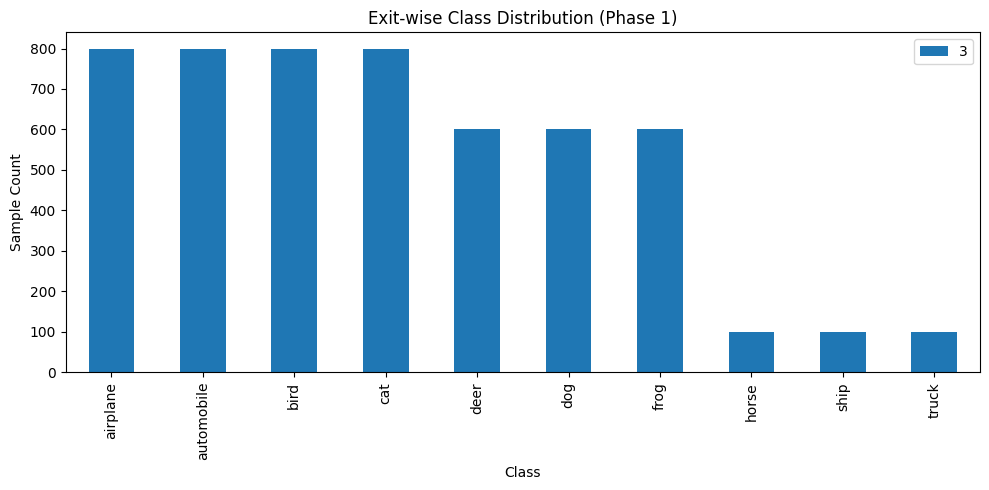

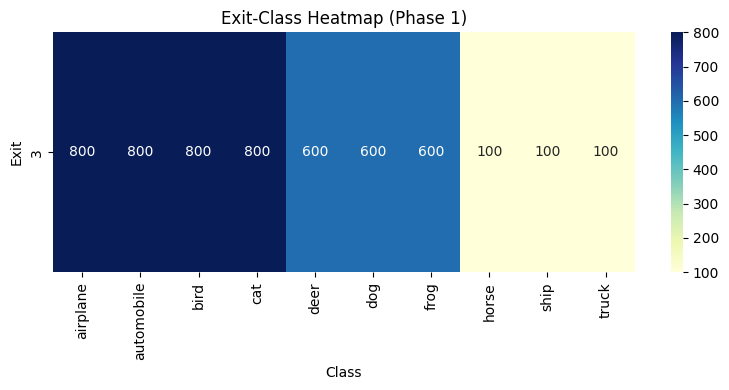


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
3      4722.0  5300.0  0.890943

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 3Ôºö
  airplane    : 89.00%
  automobile  : 90.88%
  bird        : 85.38%
  cat         : 82.62%
  deer        : 92.33%
  dog         : 87.50%
  frog        : 94.17%
  horse       : 98.00%
  ship        : 100.00%
  truck       : 97.00%

üìà ÊØè‰∏™Âá∫Âè£ÁöÑÈ¢ÑÊµãÁ±ªÂà´ÂàÜÂ∏ÉÔºö


C:\Users\Zhao\AppData\Local\Temp\ipykernel_21656\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
3          735         732   710  755   602  607   603    192   192    172

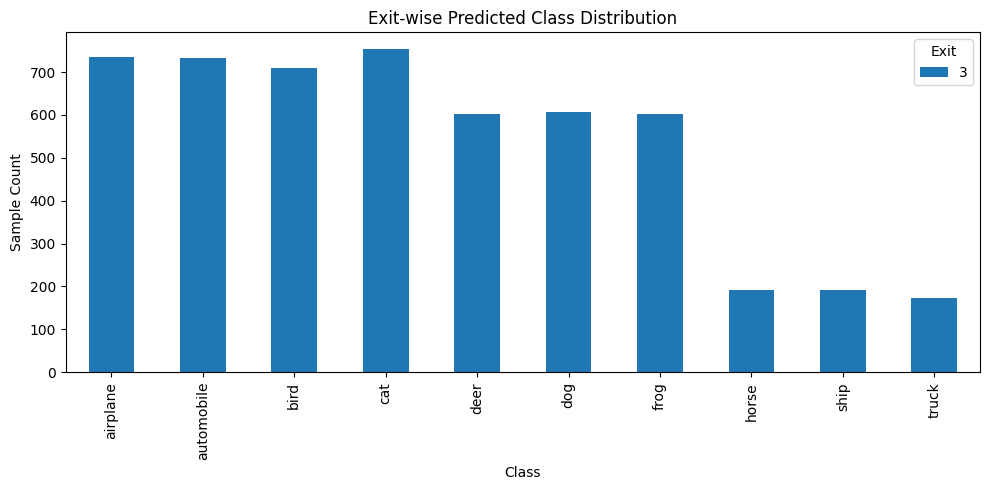

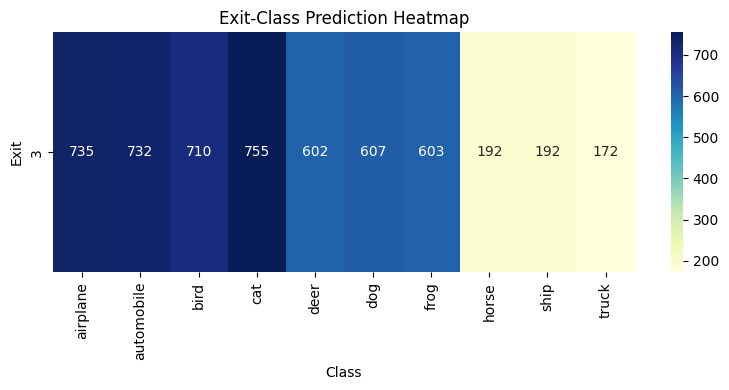

In [29]:
results, latency_logs, exit_logs = run_full_suspension_parallel_realtime_logging(
    model_with_exits,
    controller1, controller2,
    new_distribution_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b
)

In [30]:
results

{'Memory After Model Load (MB)': 1793.78,
 'Threads After Model Load': 47,
 'Memory Before Training (MB)': 1793.78,
 'Threads Before Training': 47,
 'Memory Before Inference (MB)': 1793.83,
 'Threads Before Inference': 49,
 'Memory during_infer (MB)': 1941.97,
 'Threads during_infer': 49,
 'Memory After All (MB)': 1249.74,
 'Threads After All': 50,
 'Mode': 'Full Suspension (Realtime Logging)',
 'Inference Duration (s)': 4.77,
 'Exit1 Training Time (s)': 126.85,
 'Exit2 Training Time (s)': 126.85,
 'Avg Inference Latency (s)': 0.0148,
 'Latency Std Dev (s)': 0.0365}

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\3625787915.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[A-Parallel] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...

Epoch 1/5
----------

Epoch 1/5
----------
[A-Parallel] ÂºÄÂßãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...
Train Loss: 0.3277 | ID Acc: 0.8607 | OOD Certainty: 0.2566

Epoch 2/5
----------
Train Loss: 0.1212 | ID Acc: 0.9834 | OOD Certainty: 0.1261

Epoch 2/5
----------
Train Loss: 0.1985 | ID Acc: 0.9356 | OOD Certainty: 0.2412

Epoch 3/5
----------
Train Loss: 0.0204 | ID Acc: 0.9945 | OOD Certainty: 0.1092

Epoch 3/5
----------
Train Loss: 0.1706 | ID Acc: 0.9509 | OOD Certainty: 0.2288

Epoch 4/5
----------
Train Loss: 0.0239 | ID Acc: 0.9938 | OOD Certainty: 0.1087

Epoch 4/5
----------
Train Loss: 0.1554 | ID Acc: 0.9548 | OOD Certainty: 0.2217

Epoch 5/5
----------

[Êé®ÁêÜÂÆåÊàê]
Train Loss: 0.0153 | ID Acc: 0.9957 | OOD Certainty: 0.1074

Epoch 5/5
----------
Train Loss: 0.1383 | ID Acc: 0.9635 | OOD Certainty: 0.2134
Train Loss: 0.0107 | ID Acc: 0.9970 | OOD Certainty: 0.1060
[ËÆ≠ÁªÉ Exit1 ËÄóÊó∂] ËÄóÊó∂: 129.31 Áßí

[ËÆ≠ÁªÉ 

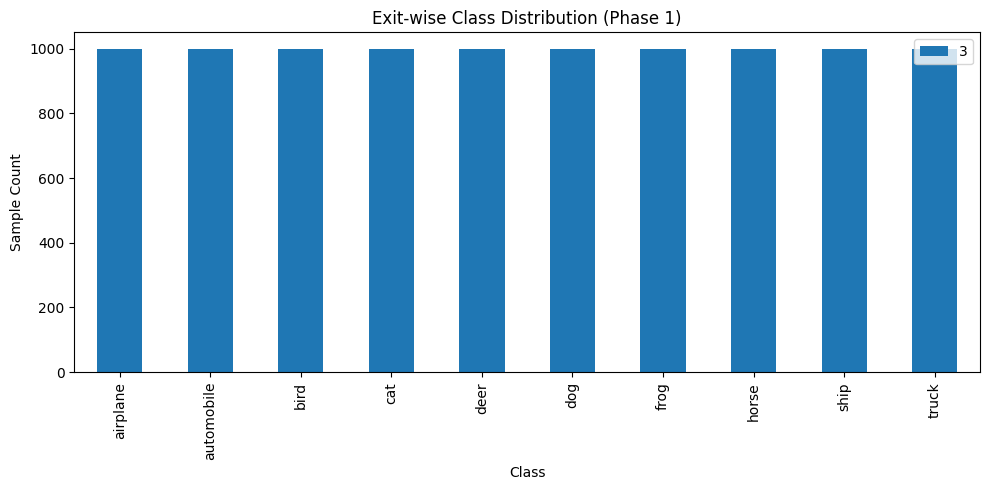

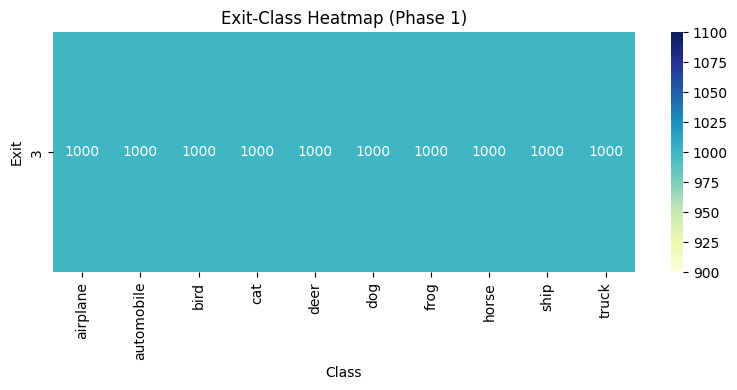


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct    total  accuracy
exit                            
3      9289.0  10000.0    0.9289

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 3Ôºö
  airplane    : 92.90%
  automobile  : 95.10%
  bird        : 89.80%
  cat         : 87.20%
  deer        : 93.80%
  dog         : 89.50%
  frog        : 95.50%
  horse       : 95.90%
  ship        : 96.30%
  truck       : 92.90%

üìà ÊØè‰∏™Âá∫Âè£ÁöÑÈ¢ÑÊµãÁ±ªÂà´ÂàÜÂ∏ÉÔºö


C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird   cat  deer  dog  frog  horse  ship  truck
Exit                                                                       
3         1008         980   970  1028   997  993  1002   1019  1022    981

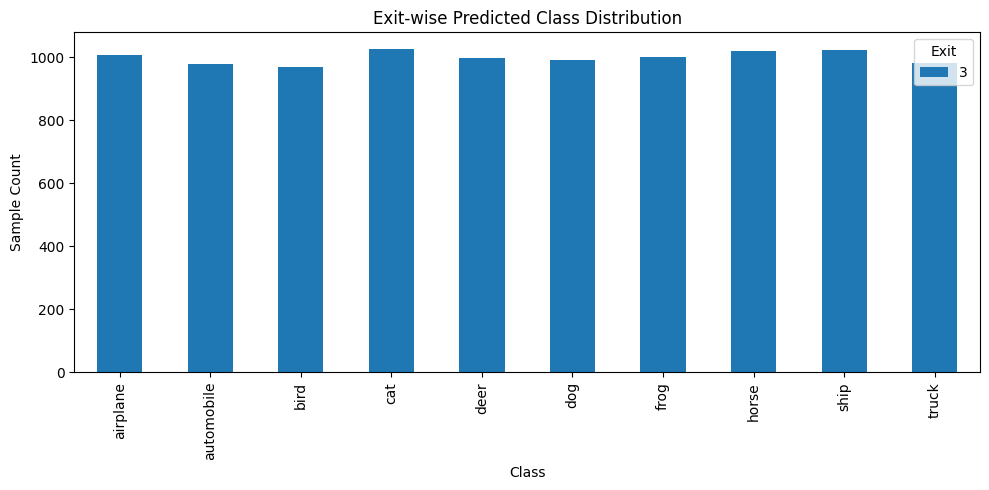

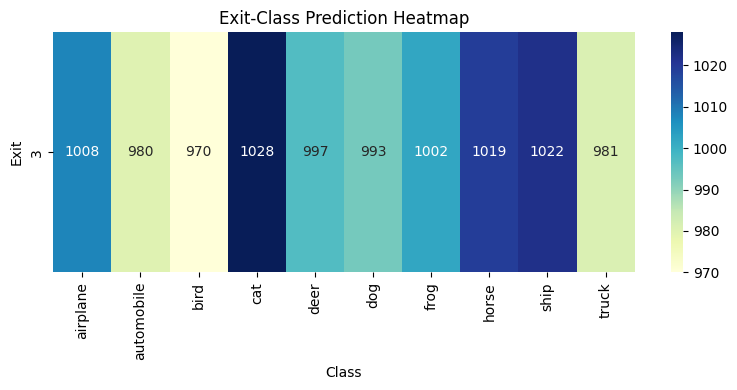

In [74]:
results, latency_logs, exit_logs = run_full_suspension_parallel_realtime_logging(
    model_with_exits,
    controller1, controller2,
    test_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b
)

In [75]:
results

{'Memory After Model Load (MB)': 820.55,
 'Threads After Model Load': 48,
 'Memory Before Training (MB)': 820.55,
 'Threads Before Training': 48,
 'Memory Before Inference (MB)': 820.6,
 'Threads Before Inference': 50,
 'Memory during_infer (MB)': 968.09,
 'Threads during_infer': 50,
 'Memory After All (MB)': 816.58,
 'Threads After All': 49,
 'Mode': 'Full Suspension (Realtime Logging)',
 'Inference Duration (s)': 102.52,
 'Exit1 Training Time (s)': 129.31,
 'Exit2 Training Time (s)': 129.31,
 'Avg Inference Latency (s)': 0.0534,
 'Latency Std Dev (s)': 0.0731}

## Pattern B


In [22]:
import time
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
import torch.nn as nn
import threading
import psutil




def run_patternB_execution(
    model,
    controller1, controller2,
    inference_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b,
    device='cuda'
):
    def get_system_status(process):
        mem = process.memory_info().rss / 1024 ** 2  # Âçï‰ΩçÔºöMB
        threads = process.num_threads()
        return threads, round(mem, 2)
    process = psutil.Process()
    results = {}
    exit_logs = defaultdict(list)
    all_logs = {'true': [], 'pred': [], 'exit': []}
    latency_logs = []
    inference_logs_phase1 = defaultdict(list)
    inference_logs_phase2 = defaultdict(list)
    # Êé®ÁêÜÁ∫øÁ®ãÂâçÂàùÂßãÂåñÊó•ÂøóÁªìÊûÑ
    for eid in [0, 1, 2]:
        inference_logs_phase1[eid]
        inference_logs_phase2[eid]

    
    model.load_state_dict(torch.load('model_with_exits.pth'))
    
    
    # === Ê®°ÂûãÂä†ËΩΩÂêéËÆ∞ÂΩï ===
    threads_after_model_load, mem_after_model_load = get_system_status(process)
    
    
    current_exit_mode = {'mode': 'exit1_train'}
    stop_flag = {'stop': False}
    switch_requested = {'flag': False}

    def inference_thread():
        print("[PatternB] ÂêØÂä®Êé®ÁêÜÁ∫øÁ®ã...")
        start_infer_time = time.time()

        for batch in inference_loader:
            if switch_requested['flag']:
                print("[PatternB] Ê£ÄÊµãÂà∞Ê®°ÂºèÂàáÊç¢ËØ∑Ê±ÇÔºåÂÆåÊàêÂΩìÂâç batch ÂêéÂàáÊç¢...")
                current_exit_mode['mode'] = 'exit2_train'
                switch_requested['flag'] = False

            images, labels = batch[0].to(device), batch[1].to(device)
            try:
                if current_exit_mode['mode'] == 'exit2_train':
                    disabled_exits = [1]
                elif current_exit_mode['mode'] == 'exit1_train':
                    disabled_exits = [2]
                else:
                    disabled_exits = []

                start = time.time()
                with torch.no_grad():
                    outputs, exit_idx = model(images, auto_select=True, disabled_exits=disabled_exits)
                end = time.time()
                latency_logs.append(end - start)

                probs = F.softmax(outputs, dim=1)
                confs, preds = torch.max(probs, dim=1)

                for i in range(len(exit_idx)):
                    exit_number = exit_idx[i].item()
                    true_label = labels[i].item()
                    pred_label = preds[i].item()

                    exit_logs[exit_number].append(true_label)
                    all_logs['true'].append(true_label)
                    all_logs['pred'].append(pred_label)
                    all_logs['exit'].append(exit_number)

                    if current_exit_mode['mode'] == 'exit1_train':
                        inference_logs_phase1[exit_number].append(true_label)
                    else:
                        inference_logs_phase2[exit_number].append(true_label)

                time.sleep(0.5)

            except Exception as e:
                print(f"[ERROR] Êé®ÁêÜÂ§±Ë¥•: {e}")

            if stop_flag['stop']:
                break

        results["Inference Duration (s)"] = round(time.time() - start_infer_time, 2)
        print("[PatternB] Êé®ÁêÜÁ∫øÁ®ãÁªìÊùü")
        
        


    infer_thread = threading.Thread(target=inference_thread)
    infer_thread.start()

    # Á¨¨‰∏ÄÈò∂ÊÆµËÆ≠ÁªÉ Exit1
    for param in model.parameters():
        param.requires_grad = False
    for param in model.early_exit1.parameters():
        param.requires_grad = True

            # === ËÆæÁΩÆ‰ºòÂåñÂô®„ÄÅËÆ≠ÁªÉÂèÇÊï∞‰πãÂâç ===
    threads_before_train, mem_before_train = get_system_status(process)
    
    optimizer1 = torch.optim.Adam(model.early_exit1.parameters(), lr=0.01)
    train_args1 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset1a["train"],
        'id_testloader': dataloaders_subset1a["test"],
        'ood_dataloader': dataloaders_subset1b["train"],
        'exit_number': 1,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer1,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }
    print("[PatternB] Á¨¨‰∏ÄÈò∂ÊÆµÔºöËÆ≠ÁªÉ Exit1 (Exit2 Âíå‰∏ªÂπ≤Â§ÑÁêÜÊé®ÁêÜ)...")
    train1_timer = Timer("ËÆ≠ÁªÉ Exit1 ËÄóÊó∂")
    train1_timer.start()
    controller1.start_training(train_function=train_args1.pop('train_function'), **train_args1)
    controller1.train_thread.join()
    train1_timer.stop()

    # Á¨¨‰∫åÈò∂ÊÆµËÆ≠ÁªÉ Exit2
    switch_requested['flag'] = True
    for param in model.early_exit1.parameters():
        param.requires_grad = False
    for param in model.early_exit2.parameters():
        param.requires_grad = True

    optimizer2 = torch.optim.Adam(model.early_exit2.parameters(), lr=0.01)
    train_args2 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset2a["train"],
        'id_testloader': dataloaders_subset2a["test"],
        'ood_dataloader': dataloaders_subset2b["train"],
        'exit_number': 2,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer2,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }
    print("[PatternB] Á¨¨‰∫åÈò∂ÊÆµÔºöËÆ≠ÁªÉ Exit2 (Exit1 Âíå‰∏ªÂπ≤Â§ÑÁêÜÊé®ÁêÜ)...")
    train2_timer = Timer("ËÆ≠ÁªÉ Exit2 ËÄóÊó∂")
    train2_timer.start()
    controller2.start_training(train_function=train_args2.pop('train_function'), **train_args2)
    controller2.train_thread.join()
    train2_timer.stop()

    stop_flag['stop'] = True
    infer_thread.join()
    
    
    mem_after = process.memory_info().rss / 1024 ** 2
    threads_after=process.num_threads()
    
    print("\n[ÂèØËßÜÂåñ] Á¨¨‰∏ÄÈò∂ÊÆµÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(inference_logs_phase1, title_suffix="(Phase 1)")
    print("\n[ÂèØËßÜÂåñ] Á¨¨‰∫åÈò∂ÊÆµÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(inference_logs_phase2, title_suffix="(Phase 2)")

    
    results["Mode"] = "PatternB"
    results["Inference Duration (s)"] = round(infer_duration, 2)
    results["Exit1 Training Time (s)"] = train1_timer.elapsed()
    results["Exit2 Training Time (s)"] = train2_timer.elapsed()
    results["Avg Inference Latency (s)"] = round(np.mean(latency_logs), 4)
    results["Latency Std Dev (s)"] = round(np.std(latency_logs), 4)
    results["Threads Before"] = threads_before
    results["Threads After"] = threads_after
    results["Memory After (MB)"] = round(mem_after, 2)
    
    
    
    print("\n[ÂèØËßÜÂåñ] ÂêàÂπ∂ÁöÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(exit_logs, title_suffix="(Combined)")

    analyze_exit_logs_with_accuracy(all_logs, [
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ])

    return results, latency_logs, exit_logs


In [65]:
import time
from collections import defaultdict, Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
import torch.nn as nn
import threading
import psutil

def run_patternB_execution(
    model,
    controller1, controller2,
    inference_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b,
    device='cuda'
):
    def get_system_status(label):
        mem = process.memory_info().rss / 1024 ** 2
        threads = process.num_threads()
        return {
            f"Memory {label} (MB)": round(mem, 2),
            f"Threads {label}": threads
        }

    results = {}
    exit_logs = defaultdict(list)
    all_logs = {'true': [], 'pred': [], 'exit': []}
    latency_logs = []
    inference_logs_phase1 = defaultdict(list)
    inference_logs_phase2 = defaultdict(list)
    for eid in [0, 1, 2]:
        inference_logs_phase1[eid]
        inference_logs_phase2[eid]

    process = psutil.Process()
    model.load_state_dict(torch.load('model_with_exits.pth'))

    results.update(get_system_status("After Model Load"))

    current_exit_mode = {'mode': 'exit1_train'}
    stop_flag = {'stop': False}
    switch_requested = {'flag': False}

    def inference_thread():
        print("[PatternB] ÂêØÂä®Êé®ÁêÜÁ∫øÁ®ã...")
        start_infer_time = time.time()
        recorded_midpoint = False

        for batch in inference_loader:
            if switch_requested['flag']:
                print("[PatternB] Ê£ÄÊµãÂà∞Ê®°ÂºèÂàáÊç¢ËØ∑Ê±ÇÔºåÂÆåÊàêÂΩìÂâç batch ÂêéÂàáÊç¢...")
                current_exit_mode['mode'] = 'exit2_train'
                switch_requested['flag'] = False

            images, labels = batch[0].to(device), batch[1].to(device)
            try:
                if current_exit_mode['mode'] == 'exit2_train':
                    disabled_exits = [1]
                elif current_exit_mode['mode'] == 'exit1_train':
                    disabled_exits = [2]
                else:
                    disabled_exits = []

                start = time.time()
                with torch.no_grad():
                    outputs, exit_idx = model(images, auto_select=True, disabled_exits=disabled_exits)
                end = time.time()
                latency_logs.append(end - start)

                if not recorded_midpoint:
                    results.update(get_system_status("during_infer"))
                    recorded_midpoint = True

                probs = F.softmax(outputs, dim=1)
                confs, preds = torch.max(probs, dim=1)

                for i in range(len(exit_idx)):
                    exit_number = exit_idx[i].item()
                    true_label = labels[i].item()
                    pred_label = preds[i].item()

                    exit_logs[exit_number].append(true_label)
                    all_logs['true'].append(true_label)
                    all_logs['pred'].append(pred_label)
                    all_logs['exit'].append(exit_number)

                    if current_exit_mode['mode'] == 'exit1_train':
                        inference_logs_phase1[exit_number].append(true_label)
                    else:
                        inference_logs_phase2[exit_number].append(true_label)

                time.sleep(0.5)

            except Exception as e:
                print(f"[ERROR] Êé®ÁêÜÂ§±Ë¥•: {e}")

            if stop_flag['stop']:
                break

        results["Inference Duration (s)"] = round(time.time() - start_infer_time, 2)
        print("[PatternB] Êé®ÁêÜÁ∫øÁ®ãÁªìÊùü")

    results.update(get_system_status("Before Training"))

    infer_thread = threading.Thread(target=inference_thread)
    infer_thread.start()

    for param in model.parameters():
        param.requires_grad = False
    for param in model.early_exit1.parameters():
        param.requires_grad = True

    optimizer1 = torch.optim.Adam(model.early_exit1.parameters(), lr=0.01)
    train_args1 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset1a["train"],
        'id_testloader': dataloaders_subset1a["test"],
        'ood_dataloader': dataloaders_subset1b["train"],
        'exit_number': 1,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer1,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }
    print("[PatternB] Á¨¨‰∏ÄÈò∂ÊÆµÔºöËÆ≠ÁªÉ Exit1 (Exit2 Âíå‰∏ªÂπ≤Â§ÑÁêÜÊé®ÁêÜ)...")
    train1_timer = Timer("ËÆ≠ÁªÉ Exit1 ËÄóÊó∂")
    train1_timer.start()
    controller1.start_training(train_function=train_args1.pop('train_function'), **train_args1)
    controller1.train_thread.join()
    train1_timer.stop()

    switch_requested['flag'] = True
    for param in model.early_exit1.parameters():
        param.requires_grad = False
    for param in model.early_exit2.parameters():
        param.requires_grad = True

    optimizer2 = torch.optim.Adam(model.early_exit2.parameters(), lr=0.01)
    train_args2 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset2a["train"],
        'id_testloader': dataloaders_subset2a["test"],
        'ood_dataloader': dataloaders_subset2b["train"],
        'exit_number': 2,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer2,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }
    print("[PatternB] Á¨¨‰∫åÈò∂ÊÆµÔºöËÆ≠ÁªÉ Exit2 (Exit1 Âíå‰∏ªÂπ≤Â§ÑÁêÜÊé®ÁêÜ)...")
    train2_timer = Timer("ËÆ≠ÁªÉ Exit2 ËÄóÊó∂")
    train2_timer.start()
    controller2.start_training(train_function=train_args2.pop('train_function'), **train_args2)
    controller2.train_thread.join()
    train2_timer.stop()

    stop_flag['stop'] = True
    infer_thread.join()

    results.update(get_system_status("After All"))

    print("\\n[ÂèØËßÜÂåñ] Á¨¨‰∏ÄÈò∂ÊÆµÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(inference_logs_phase1, title_suffix="(Phase 1)")
    print("\\n[ÂèØËßÜÂåñ] Á¨¨‰∫åÈò∂ÊÆµÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(inference_logs_phase2, title_suffix="(Phase 2)")

    results["Mode"] = "PatternB"
    results["Exit1 Training Time (s)"] = train1_timer.elapsed()
    results["Exit2 Training Time (s)"] = train2_timer.elapsed()
    results["Avg Inference Latency (s)"] = round(np.mean(latency_logs), 4)
    results["Latency Std Dev (s)"] = round(np.std(latency_logs), 4)

    print("\\n[ÂèØËßÜÂåñ] ÂêàÂπ∂ÁöÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(exit_logs, title_suffix="(Combined)")

    analyze_exit_logs_with_accuracy(all_logs, [
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ])

    return results, latency_logs, exit_logs

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\1959035408.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[PatternB] ÂêØÂä®Êé®ÁêÜÁ∫øÁ®ã...[PatternB] Á¨¨‰∏ÄÈò∂ÊÆµÔºöËÆ≠ÁªÉ Exit1 (Exit2 Âíå‰∏ªÂπ≤Â§ÑÁêÜÊé®ÁêÜ)...


Epoch 1/5
----------
Train Loss: 0.3214 | ID Acc: 0.8590 | OOD Certainty: 0.2561

Epoch 2/5
----------
Train Loss: 0.1964 | ID Acc: 0.9378 | OOD Certainty: 0.2404

Epoch 3/5
----------
Train Loss: 0.1673 | ID Acc: 0.9493 | OOD Certainty: 0.2271

Epoch 4/5
----------
Train Loss: 0.1503 | ID Acc: 0.9583 | OOD Certainty: 0.2196

Epoch 5/5
----------
[PatternB] Êé®ÁêÜÁ∫øÁ®ãÁªìÊùü
Train Loss: 0.1385 | ID Acc: 0.9633 | OOD Certainty: 0.2135
[ËÆ≠ÁªÉ Exit1 ËÄóÊó∂] ËÄóÊó∂: 112.54 Áßí

[PatternB] Á¨¨‰∫åÈò∂ÊÆµÔºöËÆ≠ÁªÉ Exit2 (Exit1 Âíå‰∏ªÂπ≤Â§ÑÁêÜÊé®ÁêÜ)...

Epoch 1/5
----------
Train Loss: 0.1233 | ID Acc: 0.9845 | OOD Certainty: 0.1281

Epoch 2/5
----------
Train Loss: 0.0200 | ID Acc: 0.9946 | OOD Certainty: 0.1095

Epoch 3/5
----------
Train Loss: 0.0150 | ID Acc: 0.9963 | OOD Certainty: 0.1079

Epoch 4/5
----------
Train Loss: 0.0182 | ID Acc: 0.9949 | OOD Certainty: 0.1073

Epoch 5/5
--

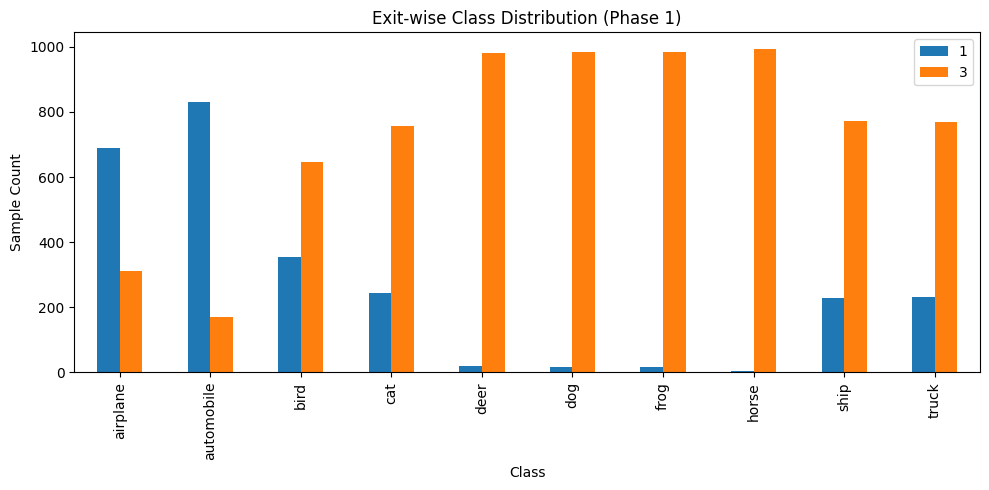

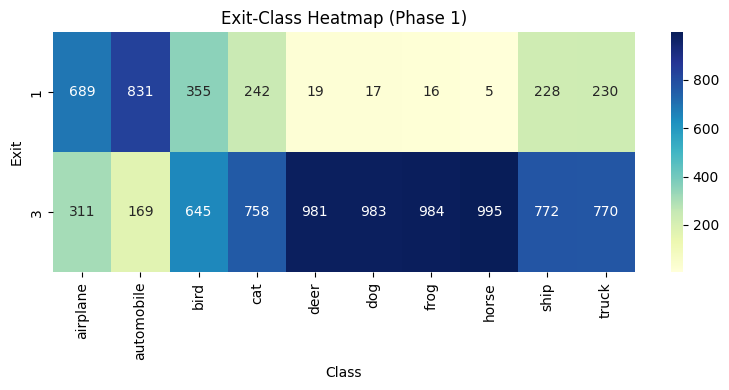

\n[ÂèØËßÜÂåñ] Á¨¨‰∫åÈò∂ÊÆµÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É
[Ë∑≥Ëøá] (Phase 2) Êé®ÁêÜÊï∞ÊçÆ‰∏∫Á©∫ÔºåÊó†Ê≥ïÂèØËßÜÂåñ„ÄÇ
\n[ÂèØËßÜÂåñ] ÂêàÂπ∂ÁöÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É


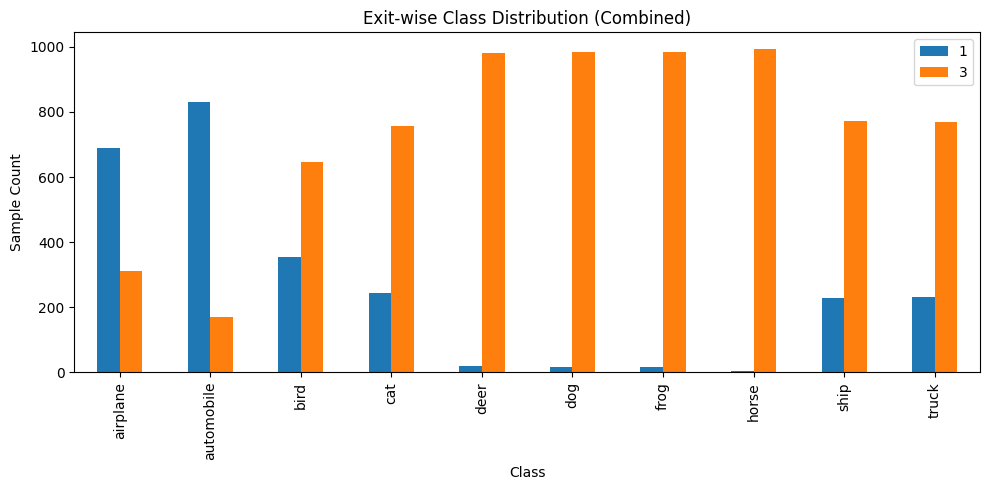

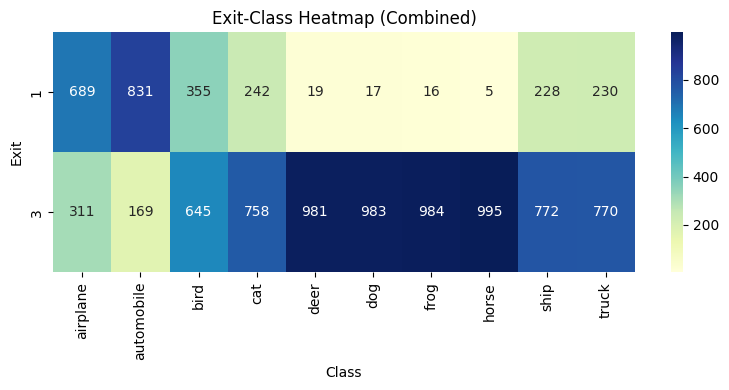


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      2436.0  2632.0  0.925532
3      6718.0  7368.0  0.911781

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 1Ôºö
  airplane    : 96.95%
  automobile  : 99.52%
  bird        : 92.11%
  cat         : 95.04%
  deer        : 0.00%
  dog         : 0.00%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 83.33%
  truck       : 84.35%

üìå Exit 3Ôºö
  airplane    : 81.99%
  automobile  : 74.56%
  bird        : 85.43%
  cat         : 83.25%
  deer        : 93.88%
  dog         : 89.62%
  frog        : 95.83%
  horse       : 95.88%
  ship        : 96.50%
  truck       : 92.34%

üìà ÊØè‰∏™Âá∫Âè£ÁöÑÈ¢ÑÊµãÁ±ªÂà´ÂàÜÂ∏ÉÔºö


C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
1          729         896   348  249     0    0     0      0   201    209
3          316         145   618  781   977  977   986   1013   797    758

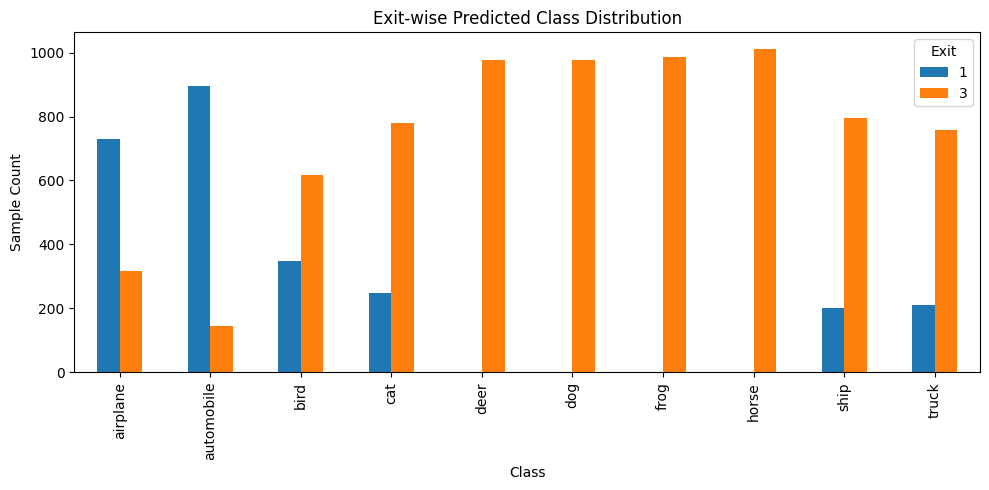

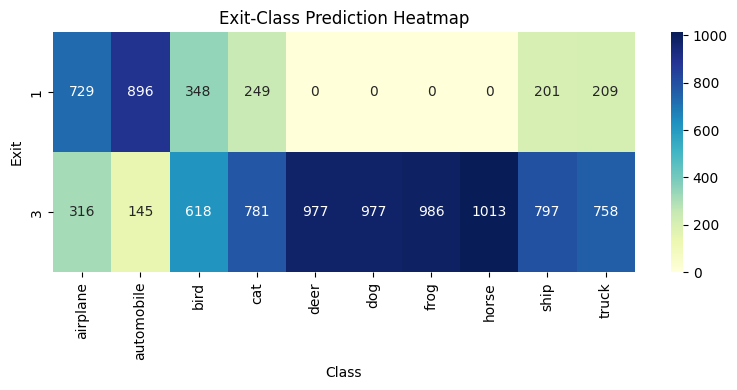

In [66]:
results, latency_logs, exit_logs = run_patternB_execution(
    model_with_exits,
    controller1, controller2,
    test_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b
)

In [67]:
results

{'Memory After Model Load (MB)': 810.26,
 'Threads After Model Load': 46,
 'Memory Before Training (MB)': 810.27,
 'Threads Before Training': 46,
 'Memory during_infer (MB)': 810.57,
 'Threads during_infer': 48,
 'Inference Duration (s)': 94.51,
 'Memory After All (MB)': 796.74,
 'Threads After All': 48,
 'Mode': 'PatternB',
 'Exit1 Training Time (s)': 112.54,
 'Exit2 Training Time (s)': 118.81,
 'Avg Inference Latency (s)': 0.0568,
 'Latency Std Dev (s)': 0.0711}

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\1959035408.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[PatternB] ÂêØÂä®Êé®ÁêÜÁ∫øÁ®ã...[PatternB] Á¨¨‰∏ÄÈò∂ÊÆµÔºöËÆ≠ÁªÉ Exit1 (Exit2 Âíå‰∏ªÂπ≤Â§ÑÁêÜÊé®ÁêÜ)...


Epoch 1/5
----------
Train Loss: 0.3255 | ID Acc: 0.8581 | OOD Certainty: 0.2578

Epoch 2/5
----------
Train Loss: 0.2006 | ID Acc: 0.9352 | OOD Certainty: 0.2413

Epoch 3/5
----------
[PatternB] Êé®ÁêÜÁ∫øÁ®ãÁªìÊùü
Train Loss: 0.1699 | ID Acc: 0.9467 | OOD Certainty: 0.2261

Epoch 4/5
----------
Train Loss: 0.1545 | ID Acc: 0.9544 | OOD Certainty: 0.2208

Epoch 5/5
----------
Train Loss: 0.1403 | ID Acc: 0.9601 | OOD Certainty: 0.2118
[ËÆ≠ÁªÉ Exit1 ËÄóÊó∂] ËÄóÊó∂: 108.51 Áßí

[PatternB] Á¨¨‰∫åÈò∂ÊÆµÔºöËÆ≠ÁªÉ Exit2 (Exit1 Âíå‰∏ªÂπ≤Â§ÑÁêÜÊé®ÁêÜ)...

Epoch 1/5
----------
Train Loss: 0.1193 | ID Acc: 0.9847 | OOD Certainty: 0.1262

Epoch 2/5
----------
Train Loss: 0.0236 | ID Acc: 0.9935 | OOD Certainty: 0.1098

Epoch 3/5
----------
Train Loss: 0.0209 | ID Acc: 0.9947 | OOD Certainty: 0.1086

Epoch 4/5
----------
Train Loss: 0.0152 | ID Acc: 0.9971 | OOD Certainty: 0.1074

Epoch 5/5
--

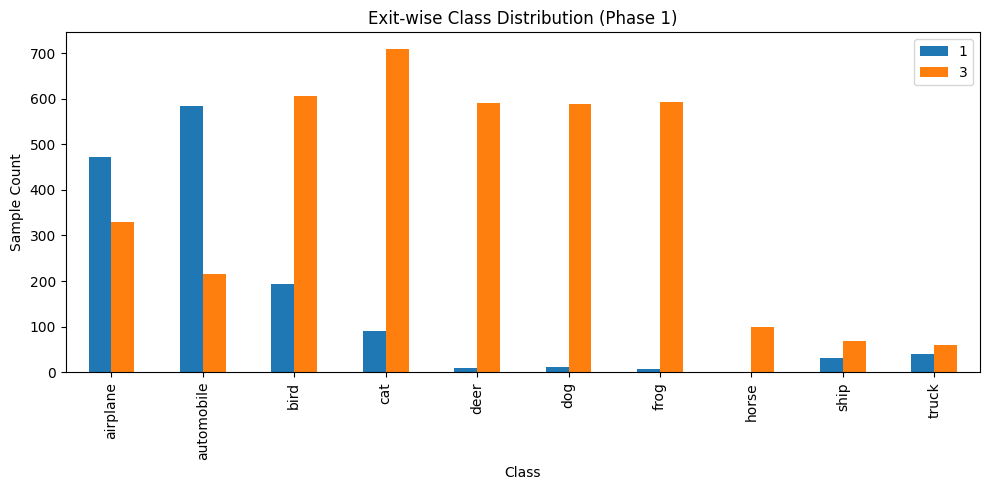

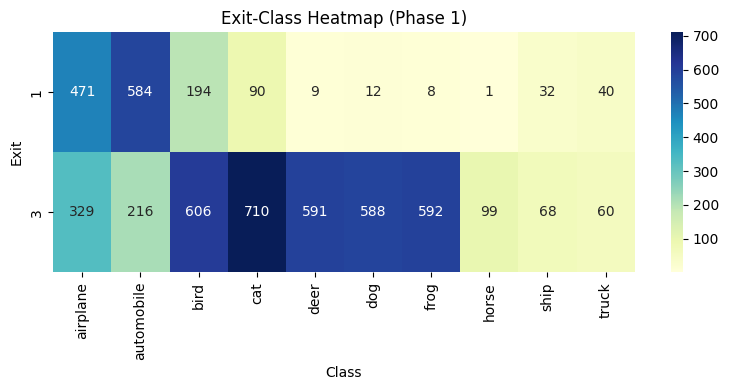

\n[ÂèØËßÜÂåñ] Á¨¨‰∫åÈò∂ÊÆµÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É
[Ë∑≥Ëøá] (Phase 2) Êé®ÁêÜÊï∞ÊçÆ‰∏∫Á©∫ÔºåÊó†Ê≥ïÂèØËßÜÂåñ„ÄÇ
\n[ÂèØËßÜÂåñ] ÂêàÂπ∂ÁöÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É


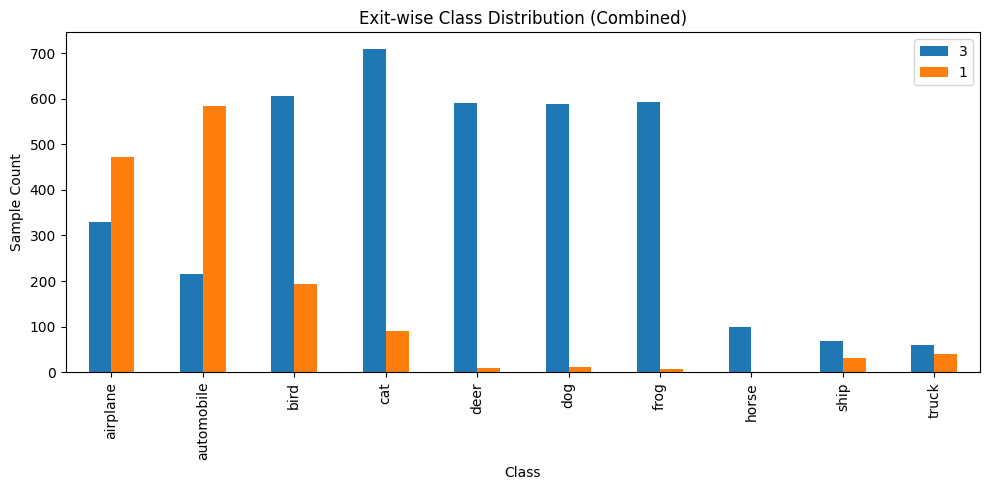

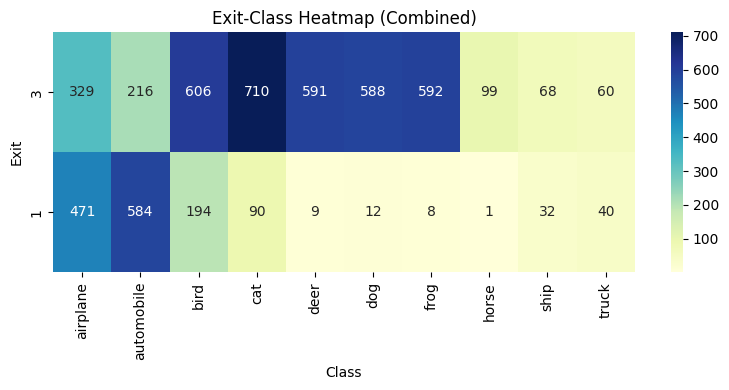


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      1293.0  1441.0  0.897294
3      3346.0  3859.0  0.867064

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 1Ôºö
  airplane    : 94.06%
  automobile  : 94.86%
  bird        : 85.05%
  cat         : 67.78%
  deer        : 0.00%
  dog         : 0.00%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 96.88%
  truck       : 97.50%

üìå Exit 3Ôºö
  airplane    : 78.42%
  automobile  : 77.78%
  bird        : 82.67%
  cat         : 81.27%
  deer        : 93.40%
  dog         : 86.73%
  frog        : 94.26%
  horse       : 96.97%
  ship        : 98.53%
  truck       : 98.33%

üìà ÊØè‰∏™Âá∫Âè£ÁöÑÈ¢ÑÊµãÁ±ªÂà´ÂàÜÂ∏ÉÔºö


C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
1          465         565   172   63     0    0     0      0    75    101
3          278         172   519  659   606  591   588    184   137    125

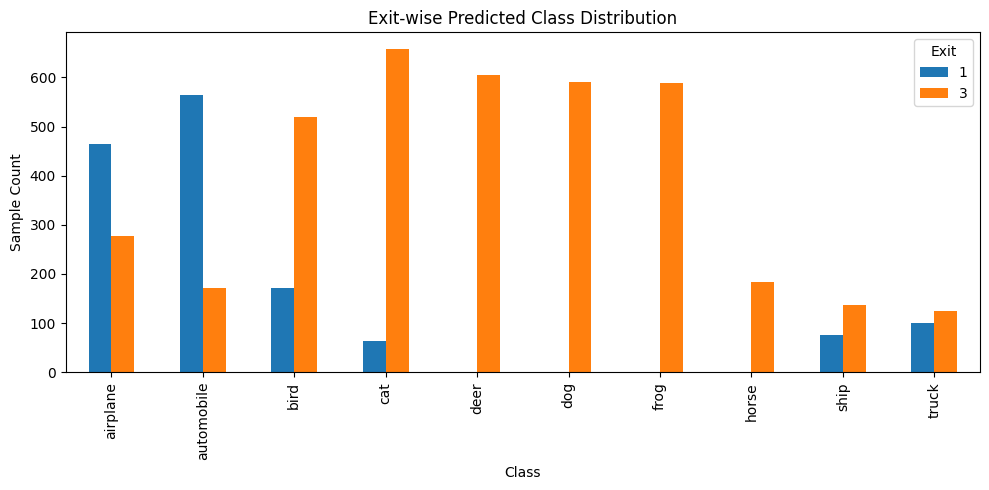

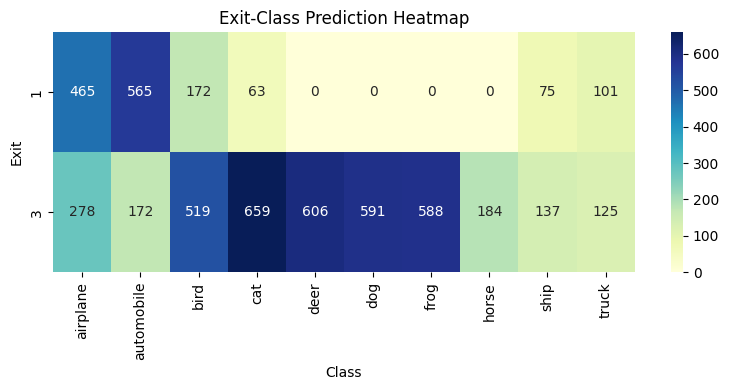

In [68]:
results, latency_logs, exit_logs = run_patternB_execution(
    model_with_exits,
    controller1, controller2,
    new_distribution_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b
)

In [69]:
results

{'Memory After Model Load (MB)': 809.34,
 'Threads After Model Load': 48,
 'Memory Before Training (MB)': 809.34,
 'Threads Before Training': 48,
 'Memory during_infer (MB)': 882.89,
 'Threads during_infer': 50,
 'Inference Duration (s)': 50.09,
 'Memory After All (MB)': 794.76,
 'Threads After All': 48,
 'Mode': 'PatternB',
 'Exit1 Training Time (s)': 108.51,
 'Exit2 Training Time (s)': 117.85,
 'Avg Inference Latency (s)': 0.0552,
 'Latency Std Dev (s)': 0.0664}

## Pattern C

In [27]:
def run_shared_parallel_execution(
    model,
    controller1, controller2,
    inference_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b,
    device='cuda'
):
    import time, psutil
    from collections import defaultdict, Counter
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import torch.nn.functional as F

    results = {}
    process = psutil.Process()

    # === Âä†ËΩΩÊ®°ÂûãÂπ∂ËÆæÁΩÆÂèÇÊï∞ ===
    model.load_state_dict(torch.load('model_with_exits.pth'))
    for param in model.parameters():
        param.requires_grad = False
    for param in model.early_exit1.parameters():
        param.requires_grad = True
    for param in model.early_exit2.parameters():
        param.requires_grad = True

    optimizer1 = torch.optim.Adam(model.early_exit1.parameters(), lr=0.01)
    optimizer2 = torch.optim.Adam(model.early_exit2.parameters(), lr=0.01)

    train_args1 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset1a["train"],
        'id_testloader': dataloaders_subset1a["test"],
        'ood_dataloader': dataloaders_subset1b["train"],
        'exit_number': 1,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer1,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }

    train_args2 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset2a["train"],
        'id_testloader': dataloaders_subset2a["test"],
        'ood_dataloader': dataloaders_subset2b["train"],
        'exit_number': 2,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer2,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }

    print("[C-Shared] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...")
    train1_timer = Timer("ËÆ≠ÁªÉ Exit1 ËÄóÊó∂")
    train2_timer = Timer("ËÆ≠ÁªÉ Exit2 ËÄóÊó∂")
    train1_timer.start()
    train2_timer.start()
    controller1.start_training(train_function=train_args1.pop('train_function'), **train_args1)
    controller2.start_training(train_function=train_args2.pop('train_function'), **train_args2)

    # === Êé®ÁêÜËÆ∞ÂΩïÁªìÊûÑ ===
    exit_logs = defaultdict(list)
    latency_logs = []
    all_logs = {'true': [], 'pred': [], 'exit': []}

    print("[C-Shared] ÂºÄÂßãÂÖ±‰∫´Ê®°ÂûãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...")
    start_infer_time = time.time()

    for batch in inference_loader:
        images, labels = batch[0].to(device), batch[1].to(device)
        try:
            start = time.time()
            with torch.no_grad():
                outputs, exit_idx = model(images, auto_select=True)  # ÊâÄÊúâ exits ÂèØÁî®
            end = time.time()
            latency_logs.append(end - start)

            probs = F.softmax(outputs, dim=1)
            confs, preds = torch.max(probs, dim=1)

            for i in range(len(exit_idx)):
                exit_number = exit_idx[i].item()
                true_label = labels[i].item()
                pred_label = preds[i].item()

                exit_logs[exit_number].append(true_label)
                all_logs['true'].append(true_label)
                all_logs['pred'].append(pred_label)
                all_logs['exit'].append(exit_number)

            time.sleep(0.5)
        except Exception as e:
            print(f"[ERROR] Êé®ÁêÜÂ§±Ë¥•: {e}")

    infer_duration = time.time() - start_infer_time
    print("\n[Êé®ÁêÜÂÆåÊàê]")

    controller1.stop_training()
    controller2.stop_training()
    train1_timer.stop()
    train2_timer.stop()
    # === Á≥ªÁªüËµÑÊ∫ê‰∏éÊÄßËÉΩËÆ∞ÂΩï ===

    results["Exit1 Training Time (s)"] = train1_timer.elapsed()
    results["Exit2 Training Time (s)"] = train2_timer.elapsed()
    mem_after = process.memory_info().rss / 1024 ** 2
    threads_after = process.num_threads()

    results["Mode"] = "Shared Parallel Execution"
    results["Inference Duration (s)"] = round(infer_duration, 2)
    results["Avg Inference Latency (s)"] = round(np.mean(latency_logs), 4)
    results["Latency Std Dev (s)"] = round(np.std(latency_logs), 4)
    results["Threads After"] = threads_after
    results["Memory After (MB)"] = round(mem_after, 2)

    print("\n[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(exit_logs, title_suffix="(Shared Mode)")
    
    analyze_exit_logs_with_accuracy(all_logs, class_names)

    return results, latency_logs, exit_logs



In [1]:
def get_system_status(label, process):
    mem = process.memory_info().rss / 1024 ** 2
    threads = process.num_threads()
    return {
        f"Memory {label} (MB)": round(mem, 2),
        f"Threads {label}": threads
    }
def run_shared_parallel_execution(
    model, 
    controller1, controller2,
    inference_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b,
    device='cuda'
):
    recorded_during_infer = False
    results = {}
    process = psutil.Process()

    # === Âä†ËΩΩÊ®°ÂûãÂπ∂ËÆæÁΩÆÂèÇÊï∞ ===
    model.load_state_dict(torch.load('model_with_exits.pth'))
    results.update(get_system_status("After Model Load", process))

    for param in model.parameters():
        param.requires_grad = False
    for param in model.early_exit1.parameters():
        param.requires_grad = True
    for param in model.early_exit2.parameters():
        param.requires_grad = True

    results.update(get_system_status("Before Training", process))

    optimizer1 = torch.optim.Adam(model.early_exit1.parameters(), lr=0.01)
    optimizer2 = torch.optim.Adam(model.early_exit2.parameters(), lr=0.01)

    train_args1 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset1a["train"],
        'id_testloader': dataloaders_subset1a["test"],
        'ood_dataloader': dataloaders_subset1b["train"],
        'exit_number': 1,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer1,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }

    train_args2 = {
        'train_function': trainEE_KL,
        'model': model,
        'id_dataloader': dataloaders_subset2a["train"],
        'id_testloader': dataloaders_subset2a["test"],
        'ood_dataloader': dataloaders_subset2b["train"],
        'exit_number': 2,
        'criterion_id': nn.CrossEntropyLoss(),
        'optimizer': optimizer2,
        'stepsize': 30,
        'num_epochs': 5,
        'alpha': 1
    }

    print("[C-Shared] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...")
    train1_timer = Timer("ËÆ≠ÁªÉ Exit1 ËÄóÊó∂")
    train2_timer = Timer("ËÆ≠ÁªÉ Exit2 ËÄóÊó∂")
    train1_timer.start()
    train2_timer.start()
    controller1.start_training(train_function=train_args1.pop('train_function'), **train_args1)
    controller2.start_training(train_function=train_args2.pop('train_function'), **train_args2)

    # === Êé®ÁêÜËÆ∞ÂΩïÁªìÊûÑ ===
    exit_logs = defaultdict(list)
    latency_logs = []
    all_logs = {'true': [], 'pred': [], 'exit': []}

    results.update(get_system_status("Before Inference", process))

    print("[C-Shared] ÂºÄÂßãÂÖ±‰∫´Ê®°ÂûãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...")
    start_infer_time = time.time()

    for batch in inference_loader:
        images, labels = batch[0].to(device), batch[1].to(device)
        try:
            start = time.time()
            with torch.no_grad():
                outputs, exit_idx = model(images, auto_select=True)
            end = time.time()
            latency_logs.append(end - start)

            probs = F.softmax(outputs, dim=1)
            confs, preds = torch.max(probs, dim=1)

            for i in range(len(exit_idx)):
                exit_number = exit_idx[i].item()
                true_label = labels[i].item()
                pred_label = preds[i].item()

                exit_logs[exit_number].append(true_label)
                all_logs['true'].append(true_label)
                all_logs['pred'].append(pred_label)
                all_logs['exit'].append(exit_number)
            if not recorded_during_infer:
                results.update(get_system_status("during_infer", process))
                recorded_during_infer = True

            time.sleep(0.5)

        except Exception as e:
            print(f"[ERROR] Êé®ÁêÜÂ§±Ë¥•: {e}")



    infer_duration = time.time() - start_infer_time
    print("\n[Êé®ÁêÜÂÆåÊàê]")

    controller1.train_thread.join()
    train1_timer.stop()
    controller2.train_thread.join()
    train2_timer.stop()

    results.update(get_system_status("After All", process))

    # === Á≥ªÁªüËµÑÊ∫ê‰∏éÊÄßËÉΩËÆ∞ÂΩï ===
    results["Mode"] = "Shared Parallel Execution"
    results["Inference Duration (s)"] = round(infer_duration, 2)
    results["Exit1 Training Time (s)"] = train1_timer.elapsed()
    results["Exit2 Training Time (s)"] = train2_timer.elapsed()
    results["Avg Inference Latency (s)"] = round(np.mean(latency_logs), 4)
    results["Latency Std Dev (s)"] = round(np.std(latency_logs), 4)

    print("\n[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏É")
    _visualize_exit_distribution(exit_logs, title_suffix="(Shared Mode)")

    analyze_exit_logs_with_accuracy(all_logs, class_names)

    return results, latency_logs, exit_logs

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\1404336642.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[C-Shared] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...

Epoch 1/5
----------

Epoch 1/5
----------
[C-Shared] ÂºÄÂßãÂÖ±‰∫´Ê®°ÂûãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...
Train Loss: 0.3205 | ID Acc: 0.8700 | OOD Certainty: 0.2597

Epoch 2/5
----------
Train Loss: 0.1221 | ID Acc: 0.9813 | OOD Certainty: 0.1272

Epoch 2/5
----------
Train Loss: 0.1896 | ID Acc: 0.9413 | OOD Certainty: 0.2386

Epoch 3/5
----------
Train Loss: 0.0191 | ID Acc: 0.9949 | OOD Certainty: 0.1096

Epoch 3/5
----------
Train Loss: 0.1679 | ID Acc: 0.9525 | OOD Certainty: 0.2284

Epoch 4/5
----------
Train Loss: 0.0183 | ID Acc: 0.9954 | OOD Certainty: 0.1083

Epoch 4/5
----------
Train Loss: 0.1533 | ID Acc: 0.9532 | OOD Certainty: 0.2200

Epoch 5/5
----------

[Êé®ÁêÜÂÆåÊàê]
Train Loss: 0.0179 | ID Acc: 0.9947 | OOD Certainty: 0.1076

Epoch 5/5
----------
Train Loss: 0.1400 | ID Acc: 0.9584 | OOD Certainty: 0.2121
[ËÆ≠ÁªÉ Exit1 ËÄóÊó∂] ËÄóÊó∂: 121.08 Áßí

Train Loss: 0.0142 | ID Acc: 0.9963 | OOD Certainty: 0.1066


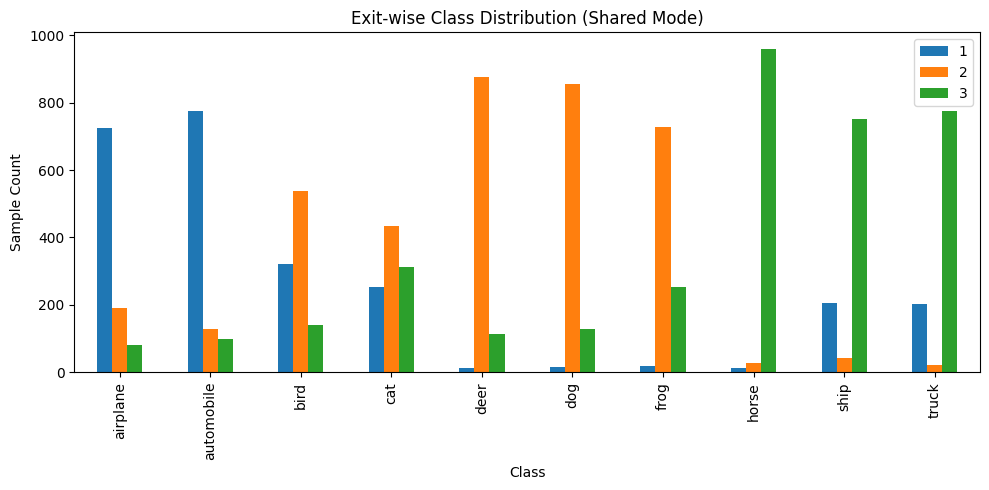

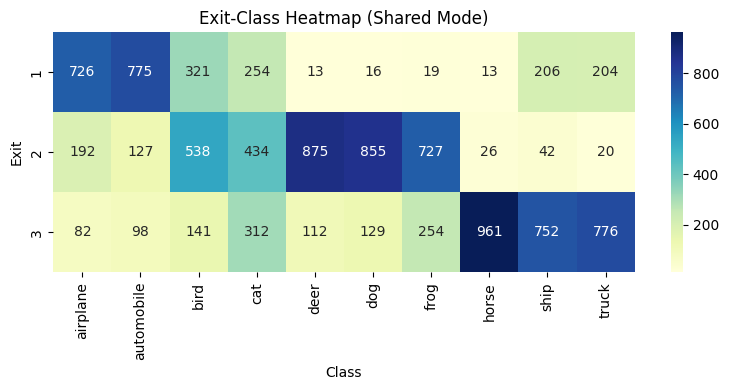


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      2359.0  2547.0  0.926188
2      3504.0  3836.0  0.913452
3      3213.0  3617.0  0.888305

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 1Ôºö
  airplane    : 97.93%
  automobile  : 99.23%
  bird        : 91.90%
  cat         : 95.67%
  deer        : 0.00%
  dog         : 0.00%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 82.52%
  truck       : 83.82%

üìå Exit 2Ôºö
  airplane    : 91.67%
  automobile  : 96.85%
  bird        : 87.17%
  cat         : 80.65%
  deer        : 96.00%
  dog         : 94.27%
  frog        : 96.56%
  horse       : 0.00%
  ship        : 66.67%
  truck       : 50.00%

üìå Exit 3Ôºö
  airplane    : 56.10%
  automobile  : 59.18%
  bird        : 64.54%
  cat         : 81.73%
  deer        : 66.07%
  dog         : 52.71%
  frog        : 90.16%
  horse       : 97.71%
  ship        : 96.94%
  truck       : 93.30%


C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
1          800         811   313  256     0    0     0      0   181    186
2          212         128   491  430   897  897   739      0    30     12
3           88          70   133  347    87  107   249    995   776    765

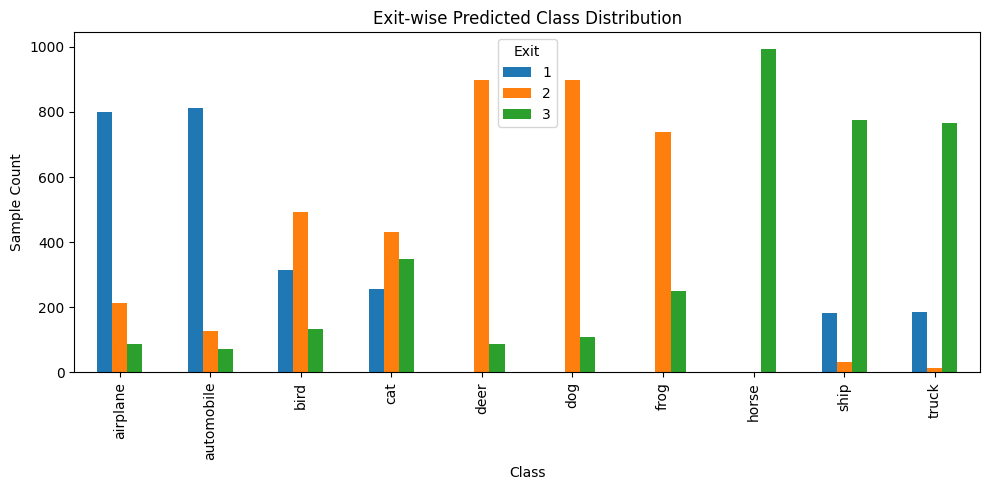

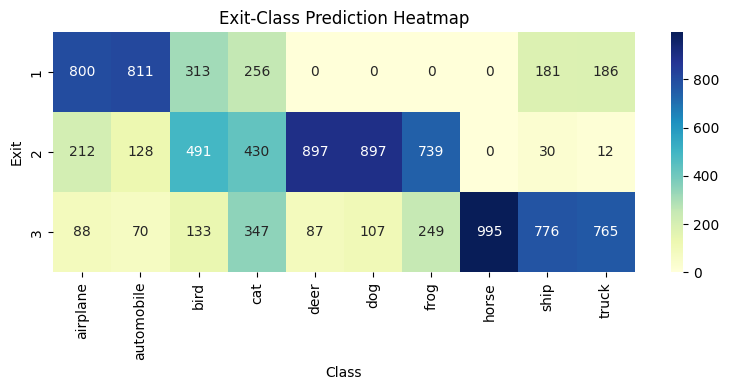

In [85]:
results, latency_logs, exit_logs = run_shared_parallel_execution(
    model_with_exits,
    controller1, controller2,
    test_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b
)

In [86]:
results

{'Memory After Model Load (MB)': 820.54,
 'Threads After Model Load': 46,
 'Memory Before Training (MB)': 820.54,
 'Threads Before Training': 46,
 'Memory Before Inference (MB)': 820.59,
 'Threads Before Inference': 48,
 'Memory during_infer (MB)': 967.85,
 'Threads during_infer': 48,
 'Memory After All (MB)': 813.47,
 'Threads After All': 48,
 'Mode': 'Shared Parallel Execution',
 'Inference Duration (s)': 102.65,
 'Exit1 Training Time (s)': 121.08,
 'Exit2 Training Time (s)': 129.3,
 'Avg Inference Latency (s)': 0.0543,
 'Latency Std Dev (s)': 0.0686}

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\1404336642.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[C-Shared] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...

Epoch 1/5
----------

Epoch 1/5
----------
[C-Shared] ÂºÄÂßãÂÖ±‰∫´Ê®°ÂûãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...
Train Loss: 0.3290 | ID Acc: 0.8600 | OOD Certainty: 0.2589

Epoch 2/5
----------
Train Loss: 0.1258 | ID Acc: 0.9827 | OOD Certainty: 0.1281

Epoch 2/5
----------
Train Loss: 0.1982 | ID Acc: 0.9366 | OOD Certainty: 0.2415

Epoch 3/5
----------
Train Loss: 0.0187 | ID Acc: 0.9957 | OOD Certainty: 0.1086

Epoch 3/5
----------

[Êé®ÁêÜÂÆåÊàê]
Train Loss: 0.1659 | ID Acc: 0.9513 | OOD Certainty: 0.2270

Epoch 4/5
----------
Train Loss: 0.0155 | ID Acc: 0.9957 | OOD Certainty: 0.1074

Epoch 4/5
----------
Train Loss: 0.1534 | ID Acc: 0.9531 | OOD Certainty: 0.2204

Epoch 5/5
----------
Train Loss: 0.0199 | ID Acc: 0.9949 | OOD Certainty: 0.1080

Epoch 5/5
----------
Train Loss: 0.1411 | ID Acc: 0.9623 | OOD Certainty: 0.2133
[ËÆ≠ÁªÉ Exit1 ËÄóÊó∂] ËÄóÊó∂: 122.06 Áßí

Train Loss: 0.0164 | ID Acc: 0.9961 | OOD Certainty: 0.1071


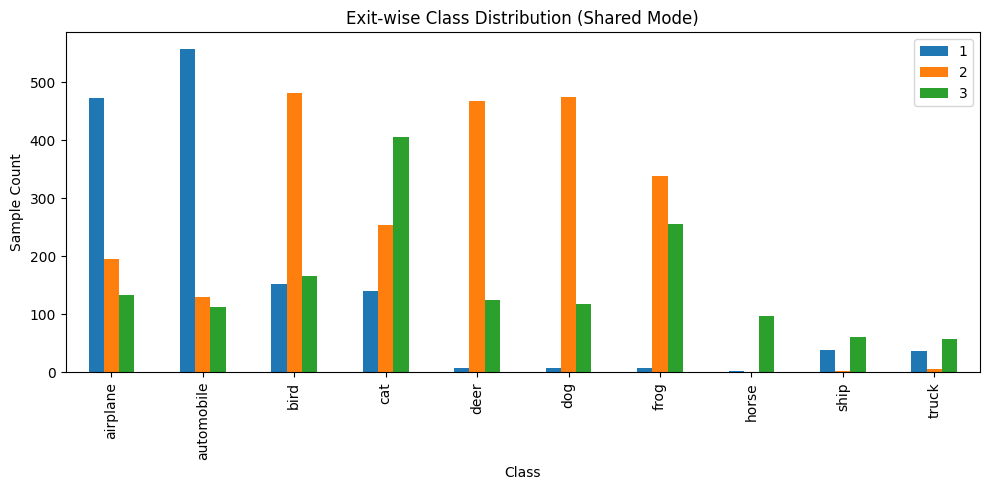

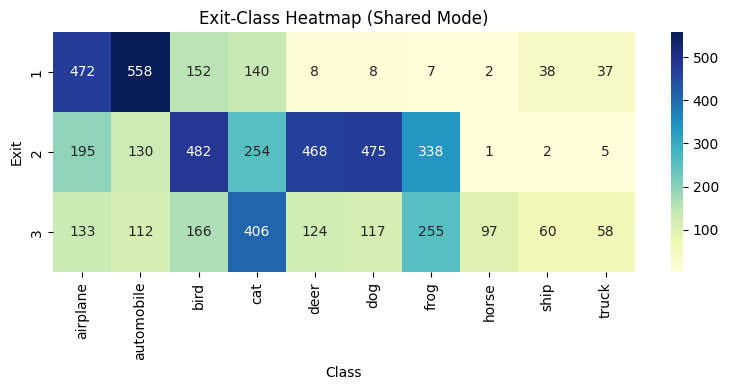


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      1306.0  1422.0  0.918425
2      2179.0  2350.0  0.927234
3      1137.0  1528.0  0.744110

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 1Ôºö
  airplane    : 94.28%
  automobile  : 94.98%
  bird        : 86.84%
  cat         : 90.00%
  deer        : 0.00%
  dog         : 0.00%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 97.37%
  truck       : 97.30%

üìå Exit 2Ôºö
  airplane    : 93.33%
  automobile  : 92.31%
  bird        : 89.83%
  cat         : 81.10%
  deer        : 96.15%
  dog         : 95.16%
  frog        : 97.63%
  horse       : 0.00%
  ship        : 50.00%
  truck       : 100.00%

üìå Exit 3Ôºö
  airplane    : 51.13%
  automobile  : 54.46%
  bird        : 59.04%
  cat         : 78.08%
  deer        : 68.55%
  dog         : 52.99%
  frog        : 92.55%
  horse       : 97.94%
  ship        : 100.00%
  truck       : 94.83

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
1          461         539   139  131     0    0     0      0    63     89
2          198         120   446  235   475  503   350      0    12     11
3           83          65   109  382   105   92   259    189   130    114

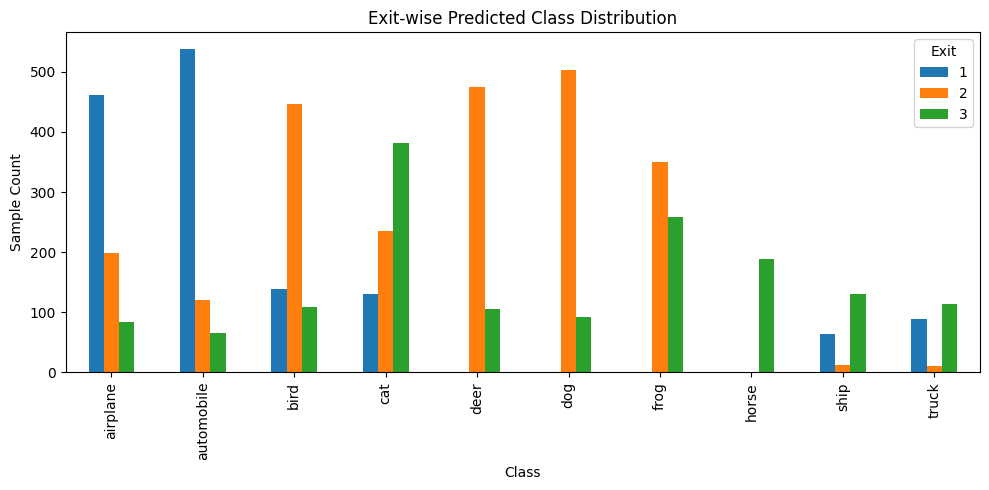

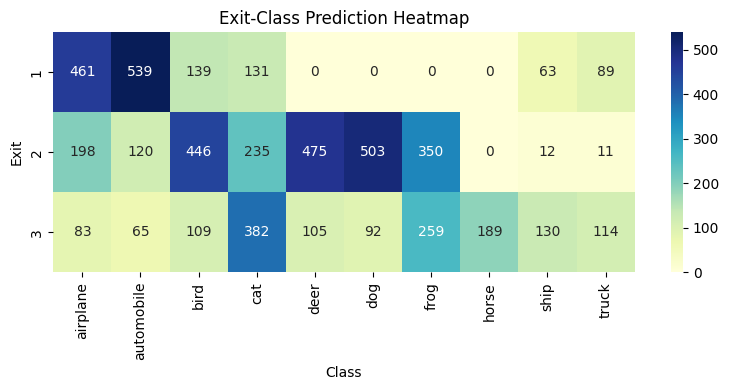

In [87]:
results, latency_logs, exit_logs = run_shared_parallel_execution(
    model_with_exits,
    controller1, controller2,
    new_distribution_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b
)


In [88]:
results

{'Memory After Model Load (MB)': 819.98,
 'Threads After Model Load': 48,
 'Memory Before Training (MB)': 819.98,
 'Threads Before Training': 48,
 'Memory Before Inference (MB)': 820.04,
 'Threads Before Inference': 50,
 'Memory during_infer (MB)': 967.05,
 'Threads during_infer': 50,
 'Memory After All (MB)': 814.3,
 'Threads After All': 48,
 'Mode': 'Shared Parallel Execution',
 'Inference Duration (s)': 54.88,
 'Exit1 Training Time (s)': 122.06,
 'Exit2 Training Time (s)': 129.61,
 'Avg Inference Latency (s)': 0.0499,
 'Latency Std Dev (s)': 0.0658}

In [25]:
classes_ratios = {
    'airplane': 0.8,    # 4‰∏™Á±ªÂà´ÂêÑ80%
    'automobile': 0.8,
    'bird': 0.8,
    'cat': 0.8,
    'deer': 0.6,        # 3‰∏™Á±ªÂà´ÂêÑ60%
    'dog': 0.6,
    'frog': 0.6,
    'horse': 0.4,       # Ââ©‰Ωô3‰∏™Á±ªÂà´ÂêÑ10%
    'ship': 0.4,
    'truck': 0.4
}

# ÂàõÂª∫Â≠êÈõÜ

subset = filter_by_samples(test_dataset, classes_ratios, seed=42)

# Êü•ÁúãÁªìÊûú
print(f"Total samples in subset: {len(subset)}")
from collections import Counter

# Ëé∑ÂèñÂéüÂßãÁ±ªÂà´ÂàÜÂ∏É
original_counts = Counter(test_dataset.targets)

# Ëé∑ÂèñÂ≠êÈõÜÁ±ªÂà´ÂàÜÂ∏É
subset_labels = [test_dataset.targets[i] for i in subset.indices]
subset_counts = Counter(subset_labels)

# ÊâìÂç∞ÁªìÊûú
for cls, idx in test_dataset.class_to_idx.items():
    original = original_counts[idx]
    subset_number = subset_counts.get(idx, 0)
    ratio = classes_ratios.get(cls, 0)
    print(f"{cls:10} | Original: {original:4} | Subset: {subset_number:4} | Target Ratio: {ratio:.0%} | Actual Ratio: {subset_number/original:.1%}")
new_distribution_loader= DataLoader(subset, batch_size=64, shuffle=True)

Total samples in subset: 6200
airplane   | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
automobile | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
bird       | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
cat        | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
deer       | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
dog        | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
frog       | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
horse      | Original: 1000 | Subset:  400 | Target Ratio: 40% | Actual Ratio: 40.0%
ship       | Original: 1000 | Subset:  400 | Target Ratio: 40% | Actual Ratio: 40.0%
truck      | Original: 1000 | Subset:  400 | Target Ratio: 40% | Actual Ratio: 40.0%


C:\Users\Zhao\AppData\Local\Temp\ipykernel_23876\2309651438.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[C-Shared] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...

Epoch 1/5
----------

Epoch 1/5
----------
[C-Shared] ÂºÄÂßãÂÖ±‰∫´Ê®°ÂûãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...
Train Loss: 0.3185 | ID Acc: 0.8619 | OOD Certainty: 0.2587

Epoch 2/5
----------
Train Loss: 0.1191 | ID Acc: 0.9850 | OOD Certainty: 0.1266

Epoch 2/5
----------
Train Loss: 0.1999 | ID Acc: 0.9382 | OOD Certainty: 0.2412

Epoch 3/5
----------
Train Loss: 0.0223 | ID Acc: 0.9945 | OOD Certainty: 0.1097

Epoch 3/5
----------

[Êé®ÁêÜÂÆåÊàê]
Train Loss: 0.1763 | ID Acc: 0.9421 | OOD Certainty: 0.2302

[training has been terminated by user]
Train Loss: 0.0169 | ID Acc: 0.9954 | OOD Certainty: 0.1085

[training has been terminated by user]

[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏ÉÔºö


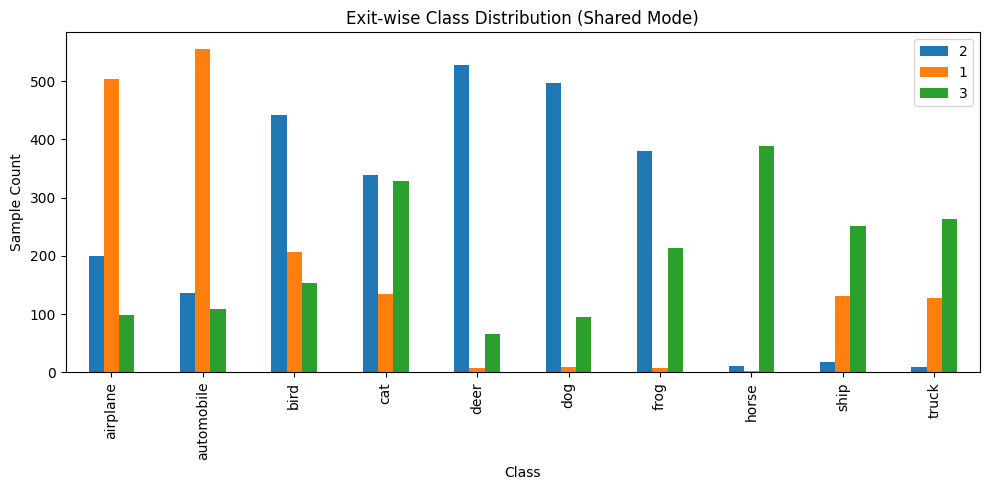

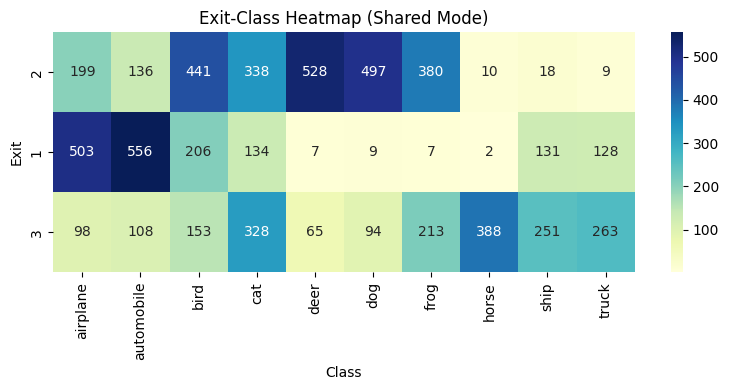


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      1595.0  1683.0  0.947712
2      2341.0  2556.0  0.915884
3      1633.0  1961.0  0.832738

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 1Ôºö
  airplane    : 97.02%
  automobile  : 97.30%
  bird        : 93.20%
  cat         : 94.78%
  deer        : 0.00%
  dog         : 0.00%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 93.89%
  truck       : 96.88%

üìå Exit 2Ôºö
  airplane    : 88.94%
  automobile  : 96.32%
  bird        : 90.02%
  cat         : 78.40%
  deer        : 96.97%
  dog         : 95.17%
  frog        : 97.11%
  horse       : 0.00%
  ship        : 77.78%
  truck       : 33.33%

üìå Exit 3Ôºö
  airplane    : 47.96%
  automobile  : 63.89%
  bird        : 55.56%
  cat         : 83.84%
  deer        : 63.08%
  dog         : 58.51%
  frog        : 91.55%
  horse       : 96.39%
  ship        : 98.01%
  truck       : 93.54%


C:\Users\Zhao\AppData\Local\Temp\ipykernel_23876\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
1          518         549   204  130     0    0     0      0   139    143
2          205         136   414  292   560  543   380      0    21      5
3           65          77   101  351    59   87   217    428   288    288

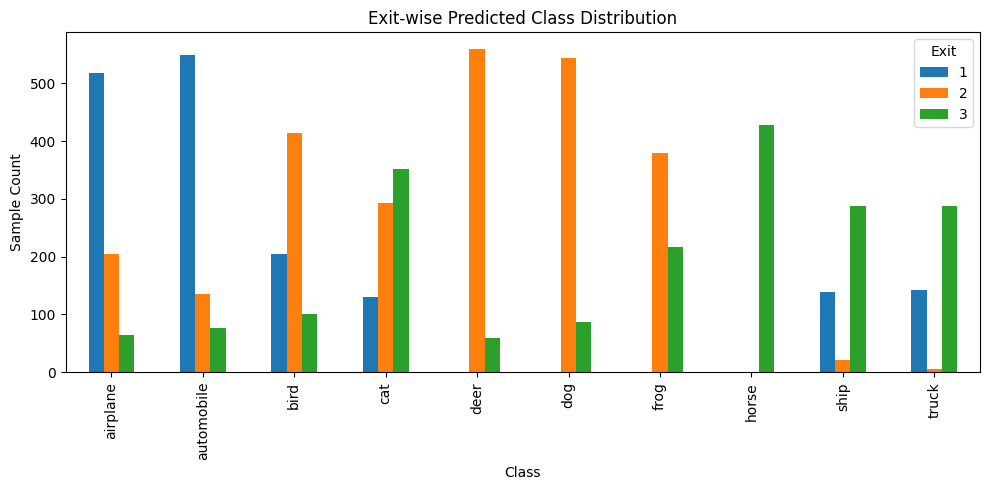

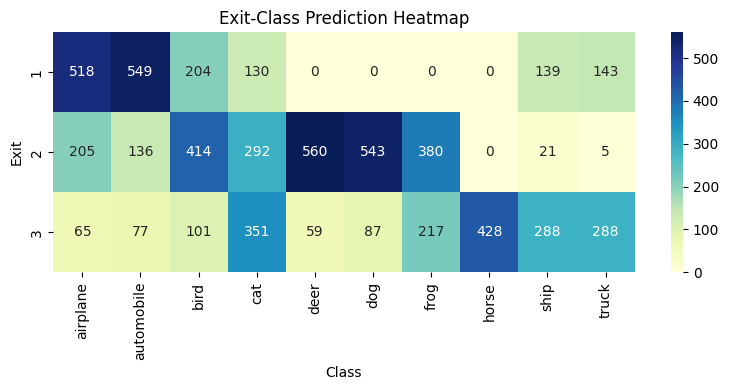

In [26]:
results, latency_logs, exit_logs = run_shared_parallel_execution(
    model_with_exits,
    controller1, controller2,
    new_distribution_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b
)


In [29]:
classes_ratios = {
    'airplane': 0.8,    # 4‰∏™Á±ªÂà´ÂêÑ80%
    'automobile': 0.8,
    'bird': 0.6,
    'cat': 0.1,
    'deer': 0.6,        # 3‰∏™Á±ªÂà´ÂêÑ60%
    'dog': 0.6,
    'frog': 0.1,
    'horse': 0.1,       # Ââ©‰Ωô3‰∏™Á±ªÂà´ÂêÑ10%
    'ship': 0.8,
    'truck': 0.8
}

# ÂàõÂª∫Â≠êÈõÜ

subset = filter_by_samples(test_dataset, classes_ratios, seed=42)

# Êü•ÁúãÁªìÊûú
print(f"Total samples in subset: {len(subset)}")
from collections import Counter

# Ëé∑ÂèñÂéüÂßãÁ±ªÂà´ÂàÜÂ∏É
original_counts = Counter(test_dataset.targets)

# Ëé∑ÂèñÂ≠êÈõÜÁ±ªÂà´ÂàÜÂ∏É
subset_labels = [test_dataset.targets[i] for i in subset.indices]
subset_counts = Counter(subset_labels)

# ÊâìÂç∞ÁªìÊûú
for cls, idx in test_dataset.class_to_idx.items():
    original = original_counts[idx]
    subset_number = subset_counts.get(idx, 0)
    ratio = classes_ratios.get(cls, 0)
    print(f"{cls:10} | Original: {original:4} | Subset: {subset_number:4} | Target Ratio: {ratio:.0%} | Actual Ratio: {subset_number/original:.1%}")
new_distribution_loader= DataLoader(subset, batch_size=64, shuffle=True)

Total samples in subset: 5300
airplane   | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
automobile | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
bird       | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
cat        | Original: 1000 | Subset:  100 | Target Ratio: 10% | Actual Ratio: 10.0%
deer       | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
dog        | Original: 1000 | Subset:  600 | Target Ratio: 60% | Actual Ratio: 60.0%
frog       | Original: 1000 | Subset:  100 | Target Ratio: 10% | Actual Ratio: 10.0%
horse      | Original: 1000 | Subset:  100 | Target Ratio: 10% | Actual Ratio: 10.0%
ship       | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%
truck      | Original: 1000 | Subset:  800 | Target Ratio: 80% | Actual Ratio: 80.0%


C:\Users\Zhao\AppData\Local\Temp\ipykernel_14444\2309651438.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[C-Shared] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...

Epoch 1/5
----------

Epoch 1/5
----------
[C-Shared] ÂºÄÂßãÂÖ±‰∫´Ê®°ÂûãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...
Train Loss: 0.3271 | ID Acc: 0.8565 | OOD Certainty: 0.2571

Epoch 2/5
----------


Exception in thread Thread-12 (_wrapper):
Traceback (most recent call last):
  File "D:\anaconda3\envs\openood\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "D:\anaconda3\envs\openood\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Zhao\AppData\Local\Temp\ipykernel_14444\4087763787.py", line 18, in _wrapper
  File "C:\Users\Zhao\AppData\Local\Temp\ipykernel_14444\2644220026.py", line 69, in trainEE_KL
  File "D:\anaconda3\envs\openood\lib\site-packages\torch\_tensor.py", line 521, in backward
    torch.autograd.backward(
  File "D:\anaconda3\envs\openood\lib\site-packages\torch\autograd\__init__.py", line 289, in backward
    _engine_run_backward(
  File "D:\anaconda3\envs\openood\lib\site-packages\torch\autograd\graph.py", line 769, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
RuntimeError: one of the variables needed for gra

Train Loss: 0.1186 | ID Acc: 0.9842 | OOD Certainty: 0.1266

Epoch 2/5
----------
Train Loss: 0.2064 | ID Acc: 0.9324 | OOD Certainty: 0.2452

Epoch 2/5
----------
Train Loss: 0.1681 | ID Acc: 0.9488 | OOD Certainty: 0.2286

Epoch 3/5
----------
Train Loss: 0.1532 | ID Acc: 0.9580 | OOD Certainty: 0.2203

Epoch 3/5
----------
Train Loss: 0.0221 | ID Acc: 0.9957 | OOD Certainty: 0.1101

Epoch 3/5
----------

[Êé®ÁêÜÂÆåÊàê]
Train Loss: 0.1413 | ID Acc: 0.9610 | OOD Certainty: 0.2134

[training has been terminated by user]
Train Loss: 0.1249 | ID Acc: 0.9683 | OOD Certainty: 0.2064

[training has been terminated by user]

[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏ÉÔºö


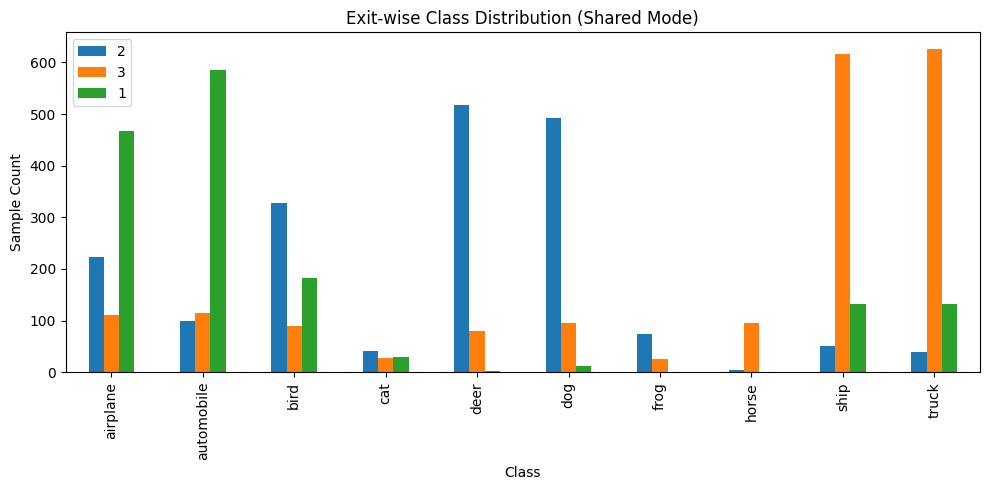

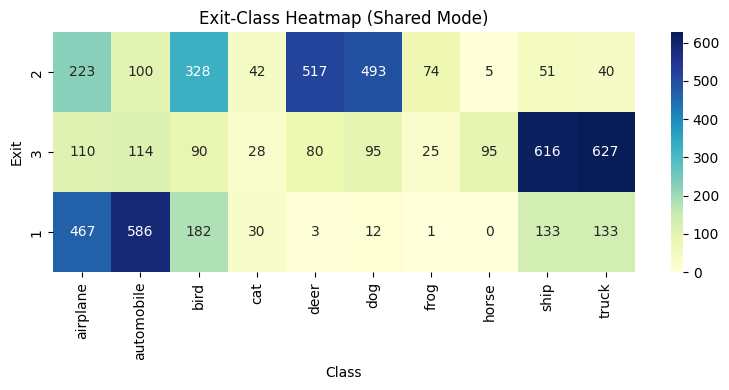


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      1464.0  1547.0  0.946348
2      1637.0  1873.0  0.873999
3      1558.0  1880.0  0.828723

üìà ÊØè‰∏™Âá∫Âè£ÁöÑÈ¢ÑÊµãÁ±ªÂà´ÂàÜÂ∏ÉÔºö


C:\Users\Zhao\AppData\Local\Temp\ipykernel_14444\2481425993.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
1          475         593   181   47     0    0     0      0   119    132
2          195          87   284  124   499  465   156      0    32     31
3           74          86    80  114    60   69    47    173   604    573

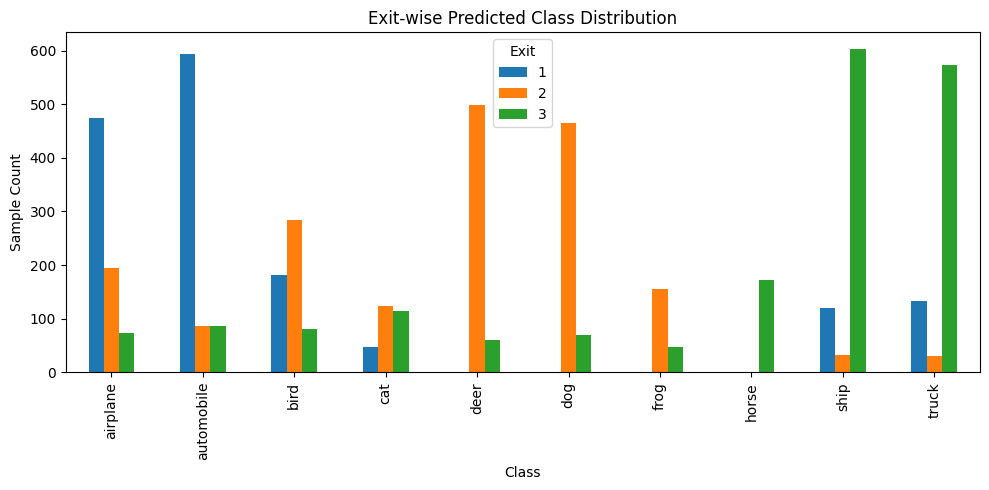

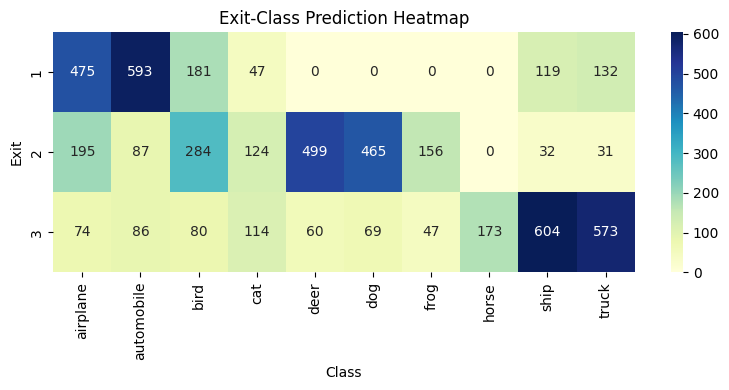

In [30]:
results, latency_logs, exit_logs = run_shared_parallel_execution(
    model_with_exits,
    controller1, controller2,
    new_distribution_loader,
    dataloaders_subset1a, dataloaders_subset1b,
    dataloaders_subset2a, dataloaders_subset2b
)


In [64]:
results, latency_logs

({'Mode': 'Shared Parallel Execution',
  'Inference Duration (s)': 54.87,
  'Avg Inference Latency (s)': 0.0714,
  'Latency Std Dev (s)': 0.0985,
  'Threads After': 55,
  'Memory After (MB)': 769.9},
 [0.5146939754486084,
  0.08522415161132812,
  0.07764816284179688,
  0.08025979995727539,
  0.4716963768005371,
  0.08101701736450195,
  0.10284304618835449,
  0.3235156536102295,
  0.006587982177734375,
  0.006023406982421875,
  0.016306638717651367,
  0.0205690860748291,
  0.11578822135925293,
  0.04235219955444336,
  0.047458648681640625,
  0.053702592849731445,
  0.08437919616699219,
  0.05143570899963379,
  0.08400177955627441,
  0.08991098403930664,
  0.2886965274810791,
  0.23460650444030762,
  0.048767805099487305,
  0.04734992980957031,
  0.018230915069580078,
  0.02435445785522461,
  0.047135353088378906,
  0.04790949821472168,
  0.05159425735473633,
  0.060431718826293945,
  0.18325304985046387,
  0.04214596748352051,
  0.026575565338134766,
  0.030104637145996094,
  0.04415249

## Pattern O

In [32]:
def run_pattern_O_no_training(
    model,
    inference_loader,
    device='cuda'
):
    import time, psutil
    from collections import defaultdict, Counter
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import torch.nn.functional as F

    results = {}
    process = psutil.Process()

    # === Âä†ËΩΩÊ®°Âûã ===
    model.load_state_dict(torch.load('model_with_exits.pth'))
    model.eval()

    # === Êé®ÁêÜËÆ∞ÂΩïÁªìÊûÑ ===
    exit_logs = defaultdict(list)
    latency_logs = []
    all_logs = {'true': [], 'pred': [], 'exit': []}

    print("[Pattern-O] ÂºÄÂßãÊé®ÁêÜËÆ∞ÂΩïÔºàÊó†ËÆ≠ÁªÉÁ∫øÁ®ãÔºåauto_select=TrueÔºâ...")
    start_infer_time = time.time()

    for batch in inference_loader:
        images, labels = batch[0].to(device), batch[1].to(device)
        try:
            start = time.time()
            with torch.no_grad():
                outputs, exit_idx = model(images, auto_select=True)
            end = time.time()
            latency_logs.append(end - start)

            probs = F.softmax(outputs, dim=1)
            confs, preds = torch.max(probs, dim=1)

            for i in range(len(exit_idx)):
                exit_number = exit_idx[i].item()
                true_label = labels[i].item()
                pred_label = preds[i].item()

                exit_logs[exit_number].append(true_label)
                all_logs['true'].append(true_label)
                all_logs['pred'].append(pred_label)
                all_logs['exit'].append(exit_number)

            time.sleep(0.5)
        except Exception as e:
            print(f"[ERROR] Êé®ÁêÜÂ§±Ë¥•: {e}")

    infer_duration = time.time() - start_infer_time
    print("\n[Êé®ÁêÜÂÆåÊàê]")

    # === Á≥ªÁªüËµÑÊ∫ê‰∏éÊÄßËÉΩËÆ∞ÂΩï ===
    mem_after = process.memory_info().rss / 1024 ** 2
    threads_after = process.num_threads()

    results["Mode"] = "Pattern-O (No Training)"
    results["Inference Duration (s)"] = round(infer_duration, 2)
    results["Avg Inference Latency (s)"] = round(np.mean(latency_logs), 4)
    results["Latency Std Dev (s)"] = round(np.std(latency_logs), 4)
    results["Threads After"] = threads_after
    results["Memory After (MB)"] = round(mem_after, 2)
    print("\n[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏ÉÔºö")

    _visualize_exit_distribution(exit_logs, title_suffix="(Shared Mode)")


    analyze_exit_logs_with_accuracy(all_logs, class_names)

    return results, latency_logs, exit_logs


In [94]:
def run_pattern_O_no_training( 
    model, 
    inference_loader,
    device='cuda'
):
    import time, psutil
    from collections import defaultdict, Counter
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import torch.nn.functional as F

    results = {}
    process = psutil.Process()

    def get_system_status(label):
        mem = process.memory_info().rss / 1024 ** 2
        threads = process.num_threads()
        return {
            f"Memory {label} (MB)": round(mem, 2),
            f"Threads {label}": threads
        }

    # === Âä†ËΩΩÊ®°Âûã ===
    model.load_state_dict(torch.load('model_with_exits.pth'))
    model.eval()
    results.update(get_system_status("After model load"))
    # === Êé®ÁêÜËÆ∞ÂΩïÁªìÊûÑ ===
    exit_logs = defaultdict(list)
    latency_logs = []
    all_logs = {'true': [], 'pred': [], 'exit': []}

    print("[Pattern-O] ÂºÄÂßãÊé®ÁêÜËÆ∞ÂΩïÔºàÊó†ËÆ≠ÁªÉÁ∫øÁ®ãÔºåauto_select=TrueÔºâ...")
    start_infer_time = time.time()
    recorded_during_infer = False  # Ê†áËÆ∞ÊòØÂê¶Â∑≤ËÆ∞ÂΩï‰∏≠ÈÄîËµÑÊ∫êÁä∂ÊÄÅ

    for batch in inference_loader:
        images, labels = batch[0].to(device), batch[1].to(device)
        try:


            start = time.time()
            with torch.no_grad():
                outputs, exit_idx = model(images, auto_select=True)
            end = time.time()
            latency_logs.append(end - start)

            probs = F.softmax(outputs, dim=1)
            confs, preds = torch.max(probs, dim=1)

            for i in range(len(exit_idx)):
                exit_number = exit_idx[i].item()
                true_label = labels[i].item()
                pred_label = preds[i].item()

                exit_logs[exit_number].append(true_label)
                all_logs['true'].append(true_label)
                all_logs['pred'].append(pred_label)
                all_logs['exit'].append(exit_number)
            if not recorded_during_infer:
                results.update(get_system_status("during_infer"))
                recorded_during_infer = True
            time.sleep(0.5)
        except Exception as e:
            print(f"[ERROR] Êé®ÁêÜÂ§±Ë¥•: {e}")

    infer_duration = time.time() - start_infer_time
    print("\n[Êé®ÁêÜÂÆåÊàê]")

    # === Á≥ªÁªüËµÑÊ∫ê‰∏éÊÄßËÉΩËÆ∞ÂΩï ===
    results.update(get_system_status("After all"))

    results["Mode"] = "Pattern-O (No Training)"
    results["Inference Duration (s)"] = round(infer_duration, 2)
    results["Avg Inference Latency (s)"] = round(np.mean(latency_logs), 4)
    results["Latency Std Dev (s)"] = round(np.std(latency_logs), 4)


    print("\n[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏ÉÔºö")
    _visualize_exit_distribution(exit_logs, title_suffix="(No Training Mode)")
    analyze_exit_logs_with_accuracy(all_logs, class_names)

    return results, latency_logs, exit_logs


C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\2824746291.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[Pattern-O] ÂºÄÂßãÊé®ÁêÜËÆ∞ÂΩïÔºàÊó†ËÆ≠ÁªÉÁ∫øÁ®ãÔºåauto_select=TrueÔºâ...

[Êé®ÁêÜÂÆåÊàê]

[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏ÉÔºö


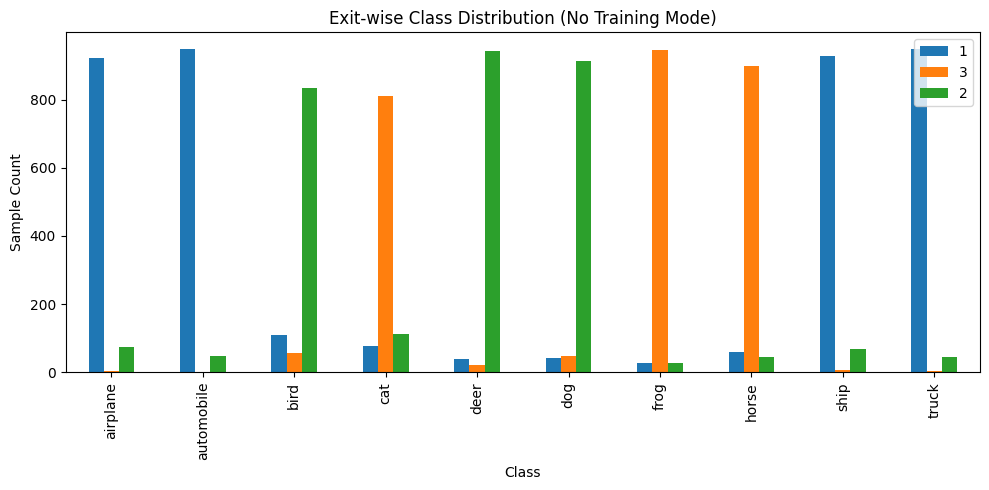

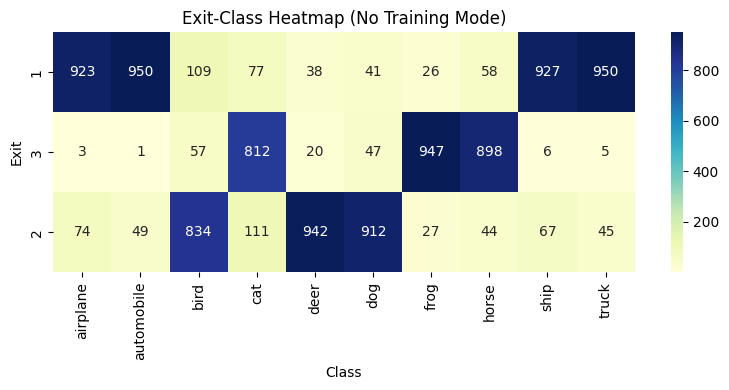


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      3622.0  4099.0  0.883630
2      2794.0  3105.0  0.899839
3      2647.0  2796.0  0.946710

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 1Ôºö
  airplane    : 95.99%
  automobile  : 96.63%
  bird        : 0.00%
  cat         : 0.00%
  deer        : 0.00%
  dog         : 0.00%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 96.22%
  truck       : 97.47%

üìå Exit 2Ôºö
  airplane    : 89.19%
  automobile  : 93.88%
  bird        : 93.29%
  cat         : 0.00%
  deer        : 97.13%
  dog         : 98.25%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 89.55%
  truck       : 73.33%

üìå Exit 3Ôºö
  airplane    : 0.00%
  automobile  : 100.00%
  bird        : 52.63%
  cat         : 96.06%
  deer        : 45.00%
  dog         : 21.28%
  frog        : 97.99%
  horse       : 98.44%
  ship        : 16.67%
  truck       : 80.00%

üì

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer   dog  frog  horse  ship  truck
Exit                                                                       
1         1100         976     0    0     0     0     0      0   971   1052
2          124          61   801    0   975  1029     0      0    73     42
3            2           3    53  845    19    23   948    896     2      5

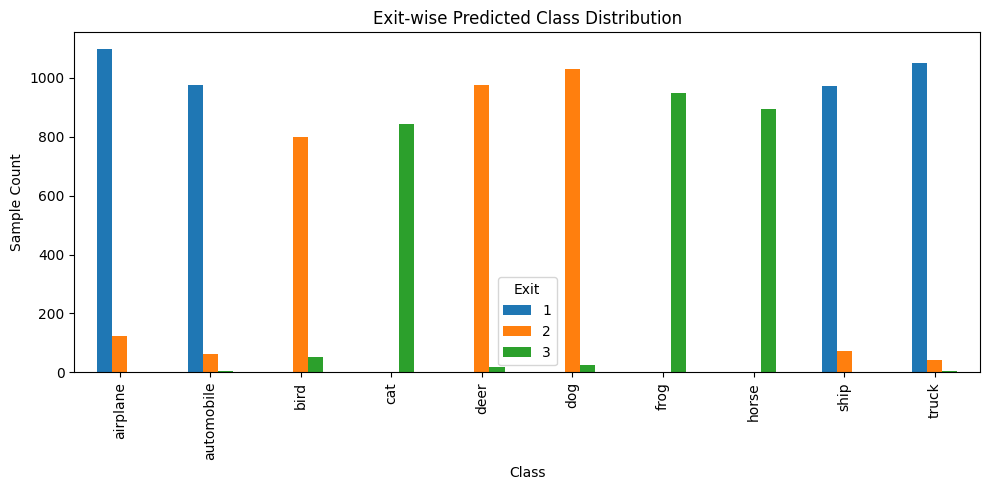

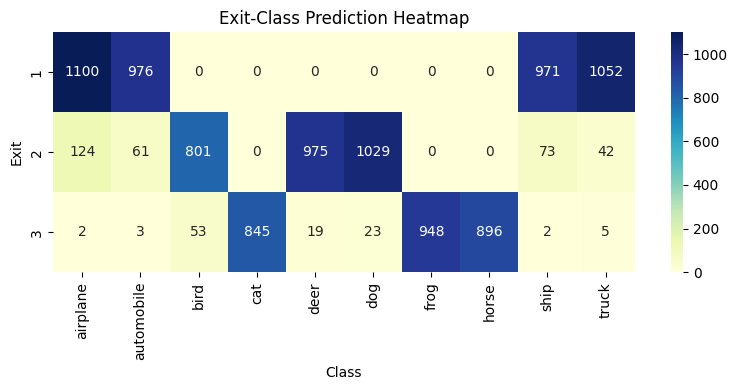

In [95]:
results, latency_logs, exit_logs = run_pattern_O_no_training(
    model_with_exits,
    test_loader
)


In [96]:
results

{'Memory After model load (MB)': 823.28,
 'Threads After model load': 46,
 'Memory during_infer (MB)': 823.96,
 'Threads during_infer': 46,
 'Memory After all (MB)': 823.38,
 'Threads After all': 46,
 'Mode': 'Pattern-O (No Training)',
 'Inference Duration (s)': 89.52,
 'Avg Inference Latency (s)': 0.0508,
 'Latency Std Dev (s)': 0.0286}

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\2824746291.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[Pattern-O] ÂºÄÂßãÊé®ÁêÜËÆ∞ÂΩïÔºàÊó†ËÆ≠ÁªÉÁ∫øÁ®ãÔºåauto_select=TrueÔºâ...

[Êé®ÁêÜÂÆåÊàê]

[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏ÉÔºö


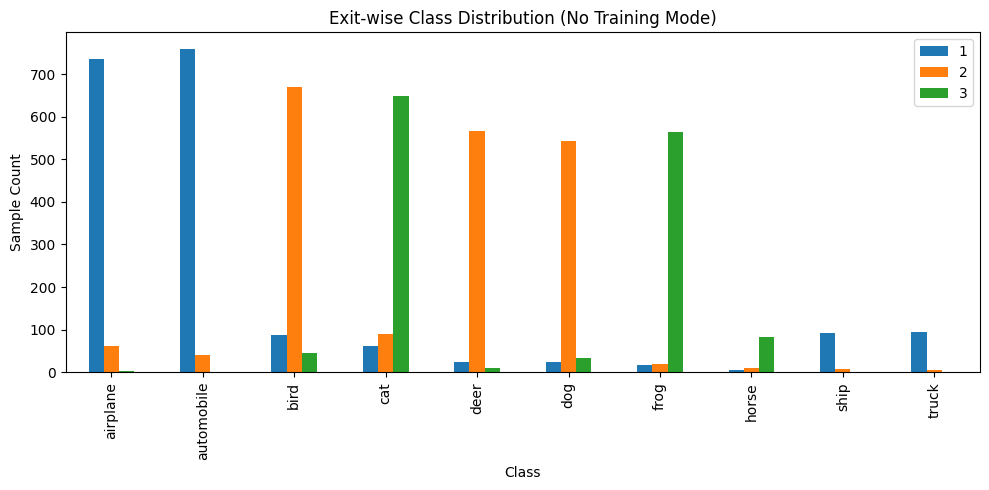

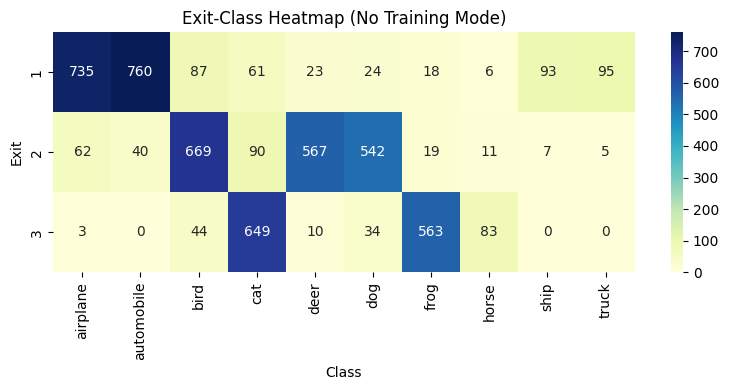


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÊÄª‰ΩìÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      1627.0  1902.0  0.855415
2      1801.0  2012.0  0.895129
3      1301.0  1386.0  0.938672

üìö ÊØè‰∏™Âá∫Âè£ÁöÑÊØèÁ±ªÂáÜÁ°ÆÁéáÔºàÊåâ true Ê†áÁ≠æÁªüËÆ°ÔºâÔºö

üìå Exit 1Ôºö
  airplane    : 95.92%
  automobile  : 96.84%
  bird        : 0.00%
  cat         : 0.00%
  deer        : 0.00%
  dog         : 0.00%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 97.85%
  truck       : 100.00%

üìå Exit 2Ôºö
  airplane    : 88.71%
  automobile  : 95.00%
  bird        : 92.38%
  cat         : 0.00%
  deer        : 96.83%
  dog         : 97.97%
  frog        : 0.00%
  horse       : 0.00%
  ship        : 71.43%
  truck       : 100.00%

üìå Exit 3Ôºö
  airplane    : 0.00%
  automobile  : 0.00%
  bird        : 52.27%
  cat         : 97.07%
  deer        : 50.00%
  dog         : 17.65%
  frog        : 98.58%
  horse       : 98.80%
  ship        : 0.00%
  truck       : 0.00%

üìà 

C:\Users\Zhao\AppData\Local\Temp\ipykernel_7892\4047240214.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
1          830         764     0    0     0    0     0      0   143    165
2           95          41   631    0   594  626     0      0    13     12
3            0           1    32  668    10   13   568     93     0      1

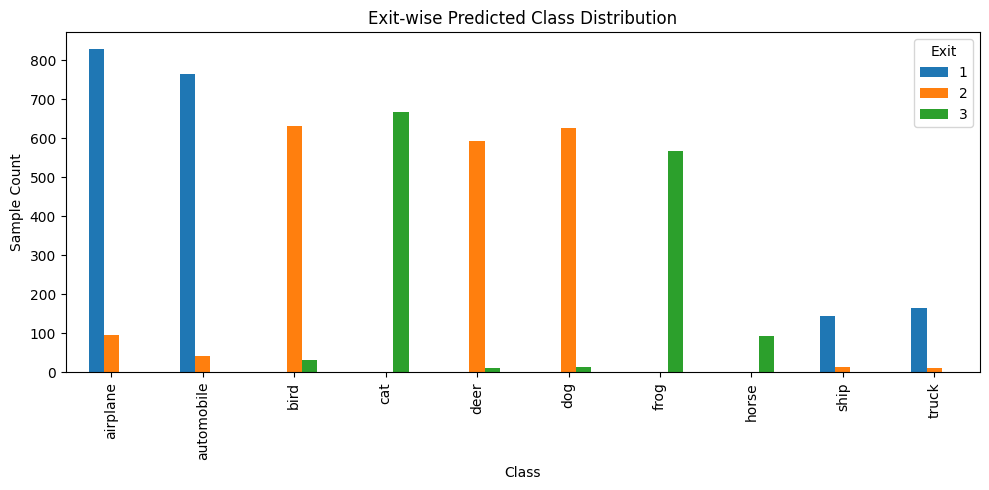

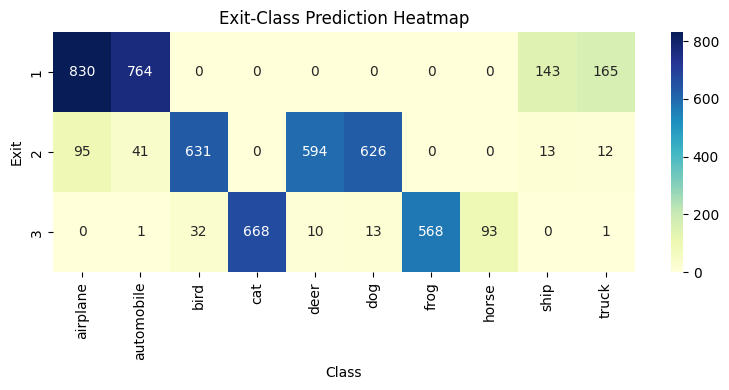

In [97]:
results, latency_logs, exit_logs = run_pattern_O_no_training(
    model_with_exits,
    new_distribution_loader
)

In [93]:
results

{'Memory during_infer (MB)': 828.59,
 'Threads during_infer': 48,
 'Mode': 'Pattern-O (No Training)',
 'Inference Duration (s)': 47.56,
 'Avg Inference Latency (s)': 0.0527,
 'Latency Std Dev (s)': 0.044,
 'Threads After': 46,
 'Memory After (MB)': 816.93}

## Profiler


In [2]:
def run_with_profiler(run_fn, log_name='default_profiler_log', steps=5, *args, **kwargs):
    """
    Run a given function with torch.profiler enabled, tracing CPU/CUDA performance.

    Parameters:
    - run_fn: the target function to execute (e.g., run_shared_parallel_execution)
    - log_name: the output directory name for the profiler logs (under ./log/)
    - steps: how many steps of profiling to activate (affects visualization granularity)
    - *args, **kwargs: arguments to pass to run_fn

    Returns:
    - the result of run_fn(*args, **kwargs)
    """
    import os
    from torch.profiler import profile, ProfilerActivity, tensorboard_trace_handler
    os.makedirs(f'./log/{log_name}', exist_ok=True)

    with profile(
        activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA],
        schedule=torch.profiler.schedule(wait=1, warmup=1, active=steps),
        on_trace_ready=tensorboard_trace_handler(f'./log/{log_name}'),
        record_shapes=True,
        profile_memory=True,
        with_stack=True
    ) as prof:
        result = run_fn(*args, **kwargs)
        for _ in range(steps):
            prof.step()

    return result

C:\Users\Zhao\AppData\Local\Temp\ipykernel_16288\2309651438.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_exits.pth'))


[C-Shared] ÂêØÂä®ËÆ≠ÁªÉÁ∫øÁ®ã Exit1 Âíå Exit2...

Epoch 1/5
----------

Epoch 1/5
----------
[C-Shared] ÂºÄÂßãÂÖ±‰∫´Ê®°ÂûãÂÆûÊó∂Êé®ÁêÜËÆ∞ÂΩïÔºàauto_select=TrueÔºâ...
Train Loss: 0.3222 | ID Acc: 0.8598 | OOD Certainty: 0.2575

Epoch 2/5
----------
Train Loss: 0.1241 | ID Acc: 0.9836 | OOD Certainty: 0.1260

Epoch 2/5
----------
Train Loss: 0.1981 | ID Acc: 0.9367 | OOD Certainty: 0.2431

Epoch 3/5
----------
Train Loss: 0.0217 | ID Acc: 0.9950 | OOD Certainty: 0.1094

Epoch 3/5
----------
Train Loss: 0.1674 | ID Acc: 0.9522 | OOD Certainty: 0.2273

Epoch 4/5
----------
Train Loss: 0.0171 | ID Acc: 0.9955 | OOD Certainty: 0.1078

Epoch 4/5
----------
Train Loss: 0.1522 | ID Acc: 0.9578 | OOD Certainty: 0.2216

Epoch 5/5
----------

[Êé®ÁêÜÂÆåÊàê]
Train Loss: 0.0177 | ID Acc: 0.9955 | OOD Certainty: 0.1072

Epoch 5/5
----------
Train Loss: 0.1415 | ID Acc: 0.9633 | OOD Certainty: 0.2145
Train Loss: 0.0133 | ID Acc: 0.9961 | OOD Certainty: 0.1060

[ÂèØËßÜÂåñ] ÂêÑÂá∫Âè£Á±ªÂà´ÂàÜÂ∏ÉÔºö


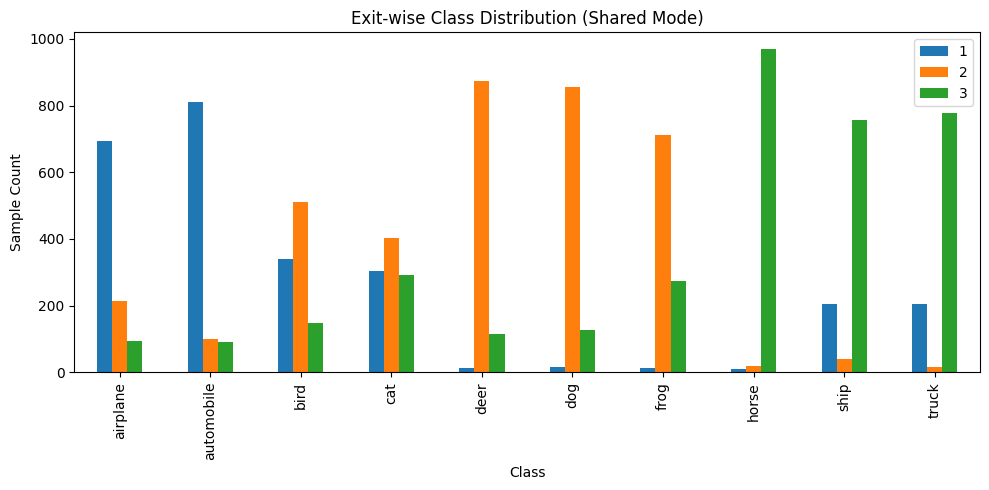

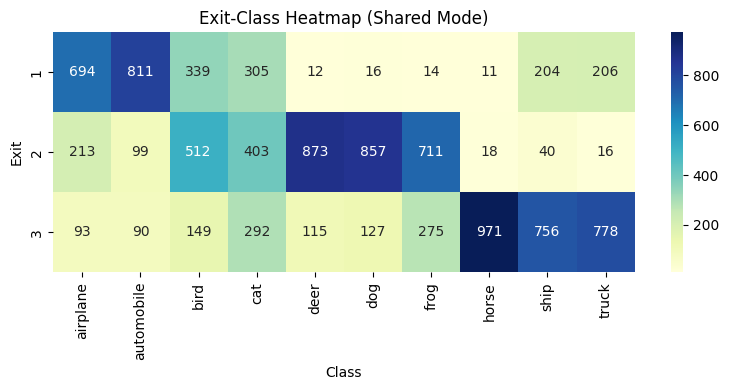


üìä ÊØè‰∏™Âá∫Âè£ÁöÑÂáÜÁ°ÆÁéáÔºö
      correct   total  accuracy
exit                           
1      2440.0  2612.0  0.934150
2      3424.0  3742.0  0.915019
3      3246.0  3646.0  0.890291

üìà ÊØè‰∏™Âá∫Âè£ÁöÑÈ¢ÑÊµãÁ±ªÂà´ÂàÜÂ∏ÉÔºö


C:\Users\Zhao\AppData\Local\Temp\ipykernel_16288\2481425993.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_stats = df.groupby('exit').apply(


airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
Exit                                                                      
1          742         853   325  315     0    0     0      0   185    192
2          237         101   487  418   873  870   713      0    30     13
3           97          61   142  330    93  102   272   1002   783    764

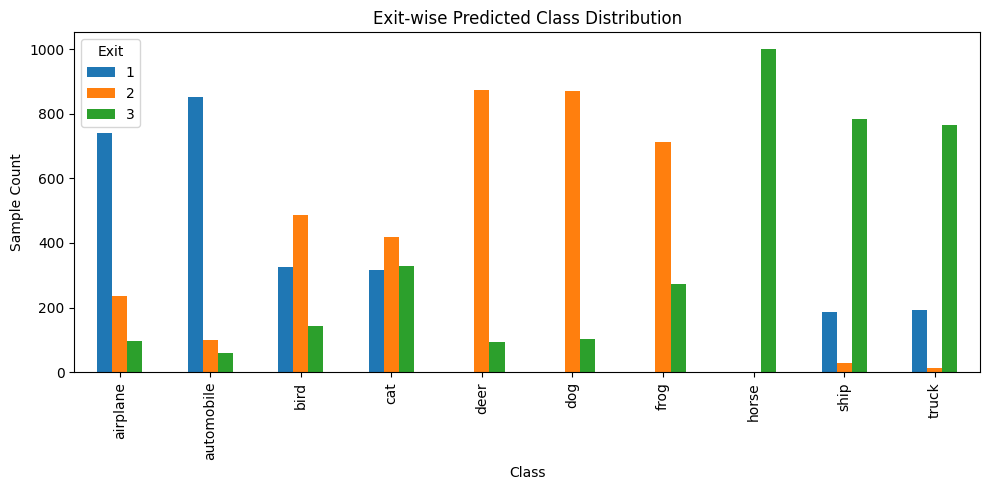

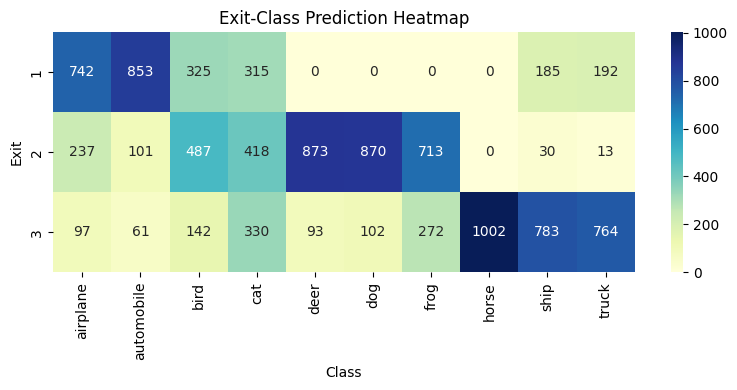

({'Mode': 'Shared Parallel Execution',
  'Inference Duration (s)': 102.27,
  'Avg Inference Latency (s)': 0.0611,
  'Latency Std Dev (s)': 0.078,
  'Threads After': 48,
  'Memory After (MB)': 1749.69},
 [0.487231969833374,
  0.0053255558013916016,
  0.005450725555419922,
  0.014990568161010742,
  0.30509161949157715,
  0.032147884368896484,
  0.042623281478881836,
  0.040667057037353516,
  0.39074254035949707,
  0.0787343978881836,
  0.07207965850830078,
  0.274169921875,
  0.14165854454040527,
  0.005513668060302734,
  0.006037712097167969,
  0.04579758644104004,
  0.017815828323364258,
  0.01901388168334961,
  0.023719072341918945,
  0.05134844779968262,
  0.12169837951660156,
  0.07861638069152832,
  0.09041380882263184,
  0.04639863967895508,
  0.0344538688659668,
  0.07500672340393066,
  0.3234226703643799,
  0.005352973937988281,
  0.0061681270599365234,
  0.006102800369262695,
  0.01704239845275879,
  0.016684293746948242,
  0.03320884704589844,
  0.024135112762451172,
  0.03330

In [19]:
run_with_profiler(
    run_fn=run_shared_parallel_execution,
    log_name='prof_modeC',
    steps=5,
    model=model_with_exits,
    controller1=controller1,
    controller2=controller2,
    inference_loader=test_loader,
    dataloaders_subset1a=dataloaders_subset1a,
    dataloaders_subset1b=dataloaders_subset1b,
    dataloaders_subset2a=dataloaders_subset2a,
    dataloaders_subset2b=dataloaders_subset2b,
    device='cuda'
)


In [22]:
%load_ext tensorboard
%tensorboard --logdir ./log/prof_modeC


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 25476), started 0:40:41 ago. (Use '!kill 25476' to kill it.)

In [23]:
%tensorboard --logdir ./log

Reusing TensorBoard on port 6006 (pid 27996), started 1:18:12 ago. (Use '!kill 27996' to kill it.)

In [24]:
import os

for root, dirs, files in os.walk("./log"):
    print(f"\nüìÇ Folder: {root}")
    for file in files:
        print(f" - {file}")


üìÇ Folder: ./log

üìÇ Folder: ./log\prof_modeC
 - DESKTOP-KF5T7HO_14444.1747324009445417200.pt.trace.json
 - DESKTOP-KF5T7HO_16288.1747324775499465900.pt.trace.json


In [26]:
model = nn.Linear(10, 10).cuda()
x = torch.randn(5, 10).cuda()

with torch.profiler.profile(
    activities=[torch.profiler.ProfilerActivity.CPU, torch.profiler.ProfilerActivity.CUDA],
    schedule=torch.profiler.schedule(wait=0, warmup=1, active=3),
    on_trace_ready=torch.profiler.tensorboard_trace_handler('./log/minitest'),
    record_shapes=True,
    profile_memory=True
) as prof:
    for i in range(5):
        y = model(x)
        y.sum().backward()
        prof.step()

In [27]:
%tensorboard --logdir=./log